In [60]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [61]:
df = pd.read_csv('Data/final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [62]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [64]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000
mean,181.240,26.042,36.407,0.126,0.087,0.190,0.005,0.007,0.132,0.045,2470.789,117.962,15.826,1.961,3622970.988,6152606.007,2.713,0.308
std,6.970,4.778,26.527,0.236,0.143,0.432,0.025,0.081,0.442,0.924,2021.703,175.207,23.384,3.744,9095409.878,13389876.391,0.986,0.461
min,156.000,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,176.000,22.000,12.000,0.000,0.000,0.053,0.000,0.000,0.000,0.000,660.000,0.000,0.000,0.000,300000.000,450000.000,2.000,0.000
50%,181.240,26.000,35.000,0.046,0.041,0.150,0.000,0.000,0.000,0.000,2101.500,37.000,5.000,1.000,800000.000,1500000.000,3.000,0.000
75%,186.000,29.000,59.000,0.172,0.133,0.248,0.000,0.000,0.000,0.000,3968.000,181.000,24.000,2.000,3000000.000,5000000.000,4.000,1.000
max,206.000,43.000,107.000,11.250,4.000,30.000,1.000,6.923,9.000,90.000,9510.000,2349.000,339.000,92.000,180000000.000,200000000.000,4.000,1.000


In [65]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:

The data is taken from transfermarkt.com, which is considered as one of the most reliable sources for football data.

#### 2. Timeliness: 

The data are taken from seasons 2021-2022 and 2022-2023

#### 3. Consistency: 

The data in our dataframe is aligned with the data available on the website.

#### 4. Relevance: 

In [66]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

All columns are potentially relevant to the predicted value and should be considered. However, we will drop the player column as it provides redundant information.

In [67]:
df.drop(['player'], axis=1, inplace=True)

In [68]:
df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,0.000,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,0.000,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,0.000,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,0.000,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [69]:
df.duplicated().sum()

0

The dataset is free of duplicated rows.

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [70]:
df.isna().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

The dataset is complete with no missing data.

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   name                 10754 non-null  object 
 2   position             10754 non-null  object 
 3   height               10754 non-null  float64
 4   age                  10754 non-null  float64
 5   appearance           10754 non-null  int64  
 6   goals                10754 non-null  float64
 7   assists              10754 non-null  float64
 8   yellow cards         10754 non-null  float64
 9   second yellow cards  10754 non-null  float64
 10  red cards            10754 non-null  float64
 11  goals conceded       10754 non-null  float64
 12  clean sheets         10754 non-null  float64
 13  minutes played       10754 non-null  int64  
 14  days_injured         10754 non-null  int64  
 15  games_injured        10754 non-null 

#### Next we will check for outliers in the dataset.

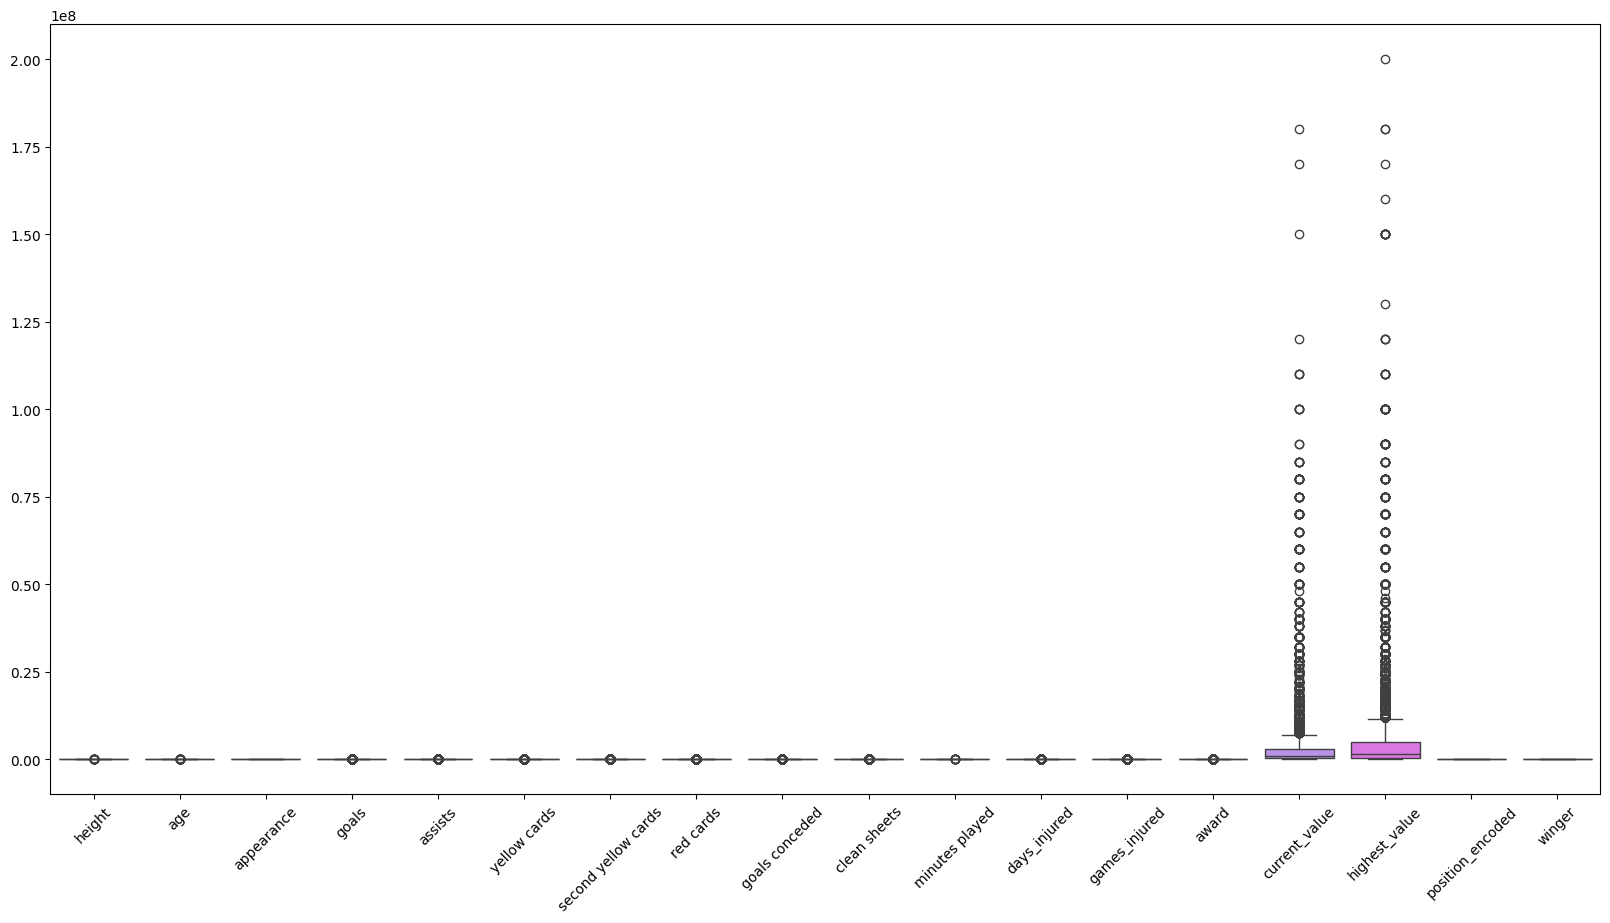

In [72]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

We can see that notable outliers are present in the current and highest value columns. We will inspect them further using histograms.

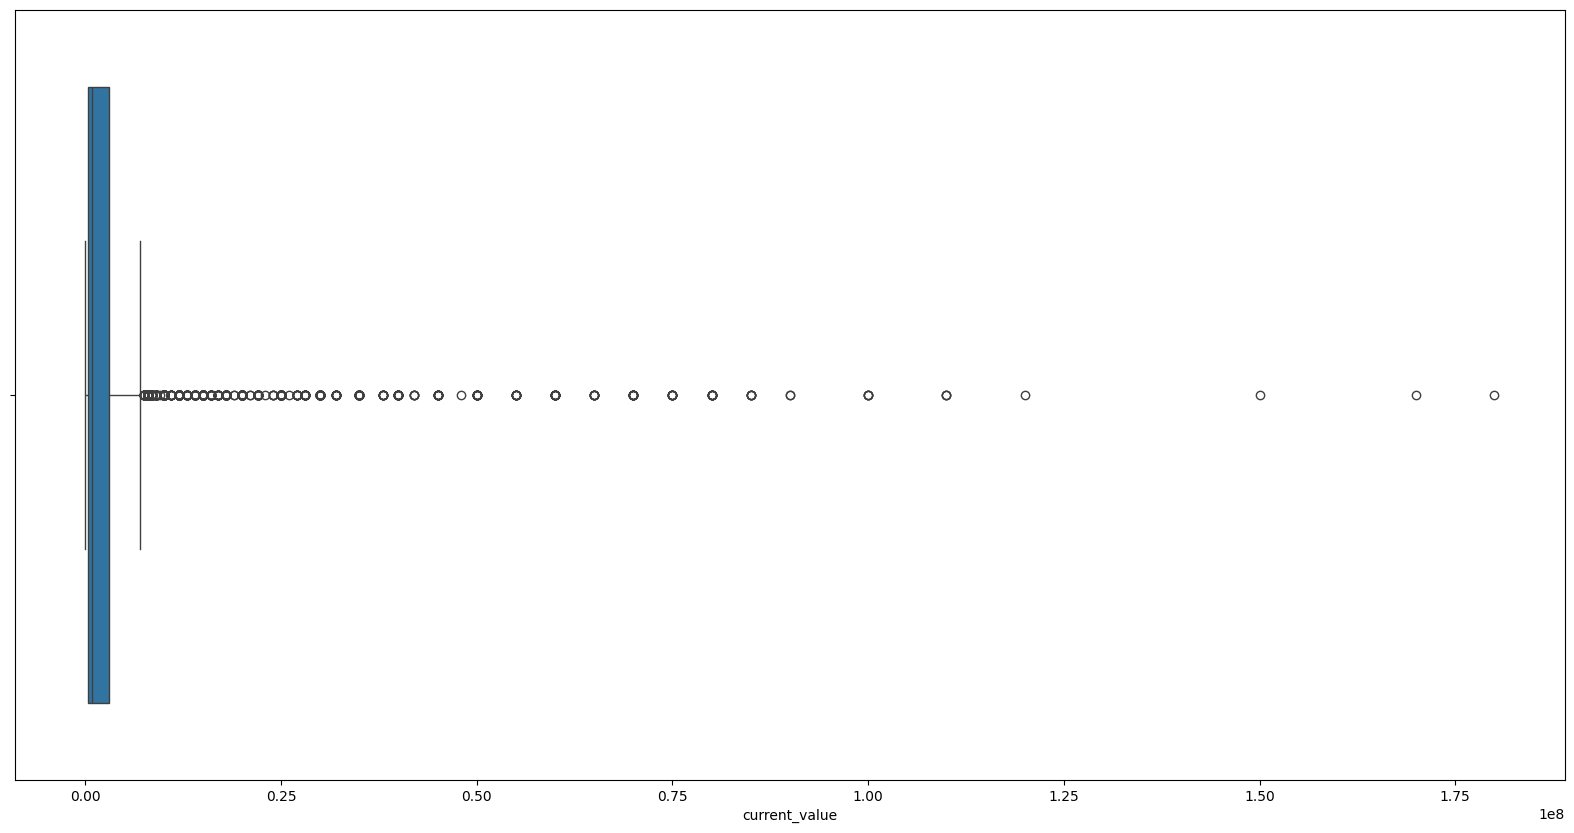

In [73]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='current_value')
plt.show()

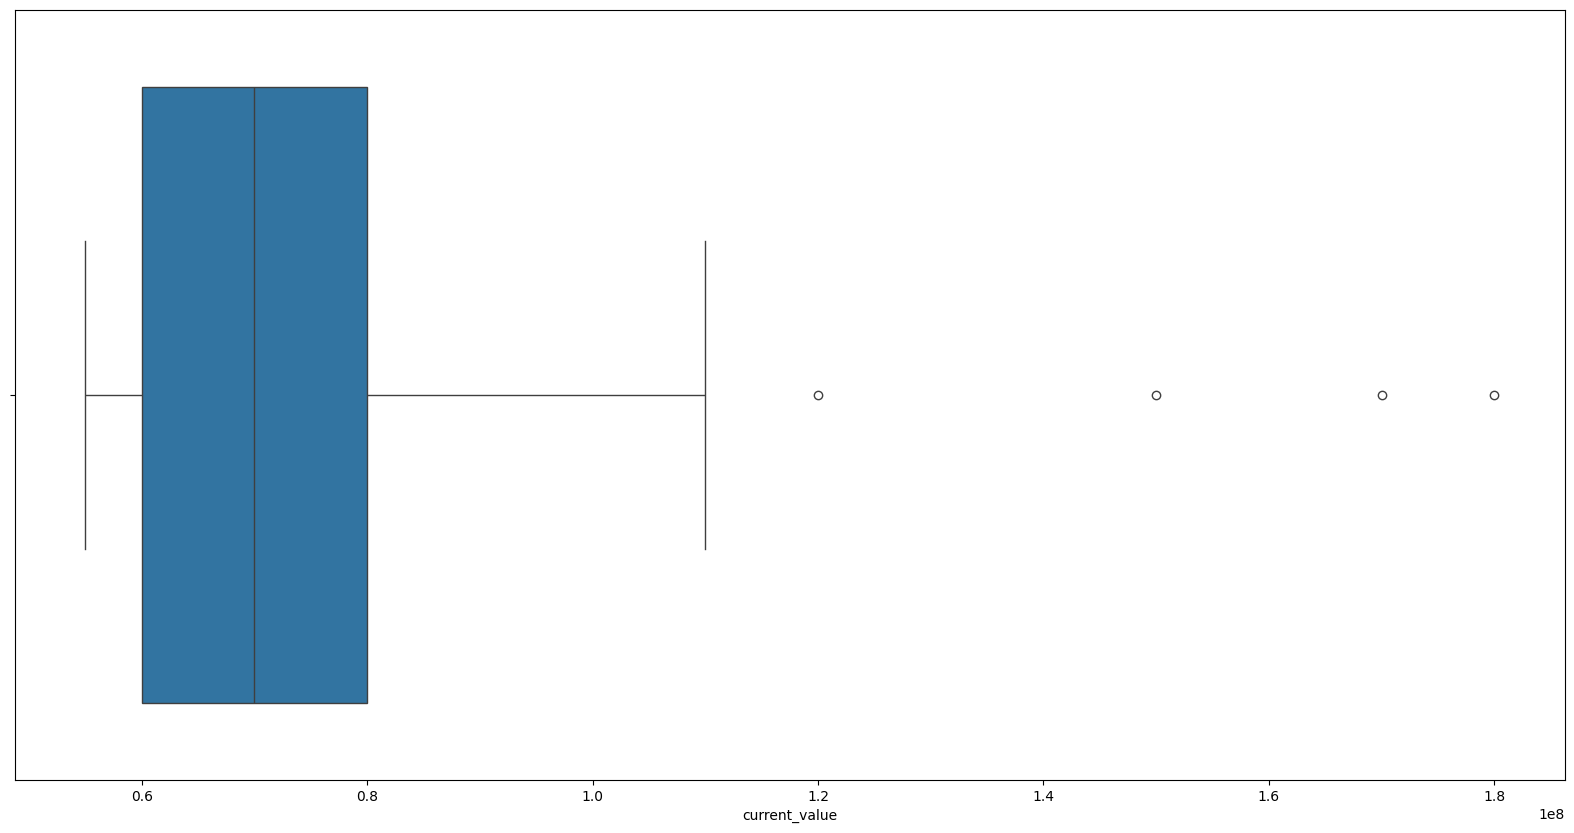

In [74]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['current_value'] > 50000000], x='current_value')
plt.show()

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

No missing values are present in the dataset.

### Correcting errors

-------------------

In [75]:
temp = df[['goals', 'assists', 'clean sheets', 'goals conceded', 'yellow cards', 'second yellow cards', 'red cards', 'minutes played']].copy()
temp.iloc[:, :-1] = temp.iloc[:, :-1].apply(lambda x: x * (temp['minutes played'] / 90))
temp.head()

,goals,assists,clean sheets,goals conceded,yellow cards,second yellow cards,red cards,minutes played
0,0.000,0.000,35.000,127.000,1.000,0.000,0.000,9390
1,0.000,0.000,3.000,18.000,1.000,0.000,0.000,1304
2,0.000,0.000,3.000,2.000,0.000,0.000,0.000,292
3,2.000,4.000,0.000,0.000,16.000,0.000,0.000,6408
4,1.000,1.000,0.000,0.000,3.000,0.000,0.000,5031


In [76]:
# We will change the columns names in the original dataframe to goals_per_90, assists_per_90, clean_sheets_per_90, goals_conceded_per_90, yellow_cards_per_90, second_yellow_cards_per_90, red_cards_per_90, minutes_played_per_90
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.rename(columns={
    'goals': 'goals_per_90',
    'assists': 'assists_per_90',
    'clean sheets': 'clean_sheets_per_90',
    'goals conceded': 'goals_conceded_per_90',
    'yellow cards': 'yellow_cards_per_90',
    'second yellow cards': 'second_yellow_cards_per_90',
    'red cards': 'red_cards_per_90',
    'minutes played': 'minutes_played_per_90'
}, inplace=True)
df.head()


,team,name,position,height,age,appearance,goals_per_90,assists_per_90,yellow_cards_per_90,second_yellow_cards_per_90,...,goals_conceded_per_90,clean_sheets_per_90,minutes_played_per_90,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,0.000,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,0.000,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,0.000,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,0.000,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


In [77]:
df = pd.concat([df, temp], axis=1)
df.describe

<bound method NDFrame.describe of                            team                name               position  \
0             Manchester United        David de Gea             Goalkeeper   
1             Manchester United        Jack Butland             Goalkeeper   
2             Manchester United          Tom Heaton             Goalkeeper   
3             Manchester United   Lisandro Martínez   Defender Centre-Back   
4             Manchester United      Raphaël Varane   Defender Centre-Back   
...                         ...                 ...                    ...   
10749  Western Sydney Wanderers       Aidan Simmons     Attack-RightWinger   
10750  Western Sydney Wanderers        Kusini Yengi  Attack Centre-Forward   
10751  Western Sydney Wanderers     Nathanael Blair  Attack Centre-Forward   
10752  Western Sydney Wanderers    Zachary Sapsford  Attack Centre-Forward   
10753  Western Sydney Wanderers  Alexander Badolato  Attack Centre-Forward   

       height    age  appeara

### Dealing with outliers:

In general the value of a player is calculated differently by different positions. So we will check the outliers for each position separately.

In [78]:
df2 = df.copy()
df2['position'] = df2['position'].apply(lambda x: x.split('-')[0]).apply(lambda x: x.split(' ')[0])
df2['position'].unique()

array(['Goalkeeper', 'Defender', 'midfield', 'Attack'], dtype=object)

In [79]:
df['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [80]:
# Now we will create 4 data frames according to the positions above
df_gk = df2[df2['position'] == 'Goalkeeper']
df_def = df2[df2['position'] == 'Defender']
df_mid = df2[df2['position'] == 'midfield']
df_fwd = df2[df2['position'] == 'Attack']

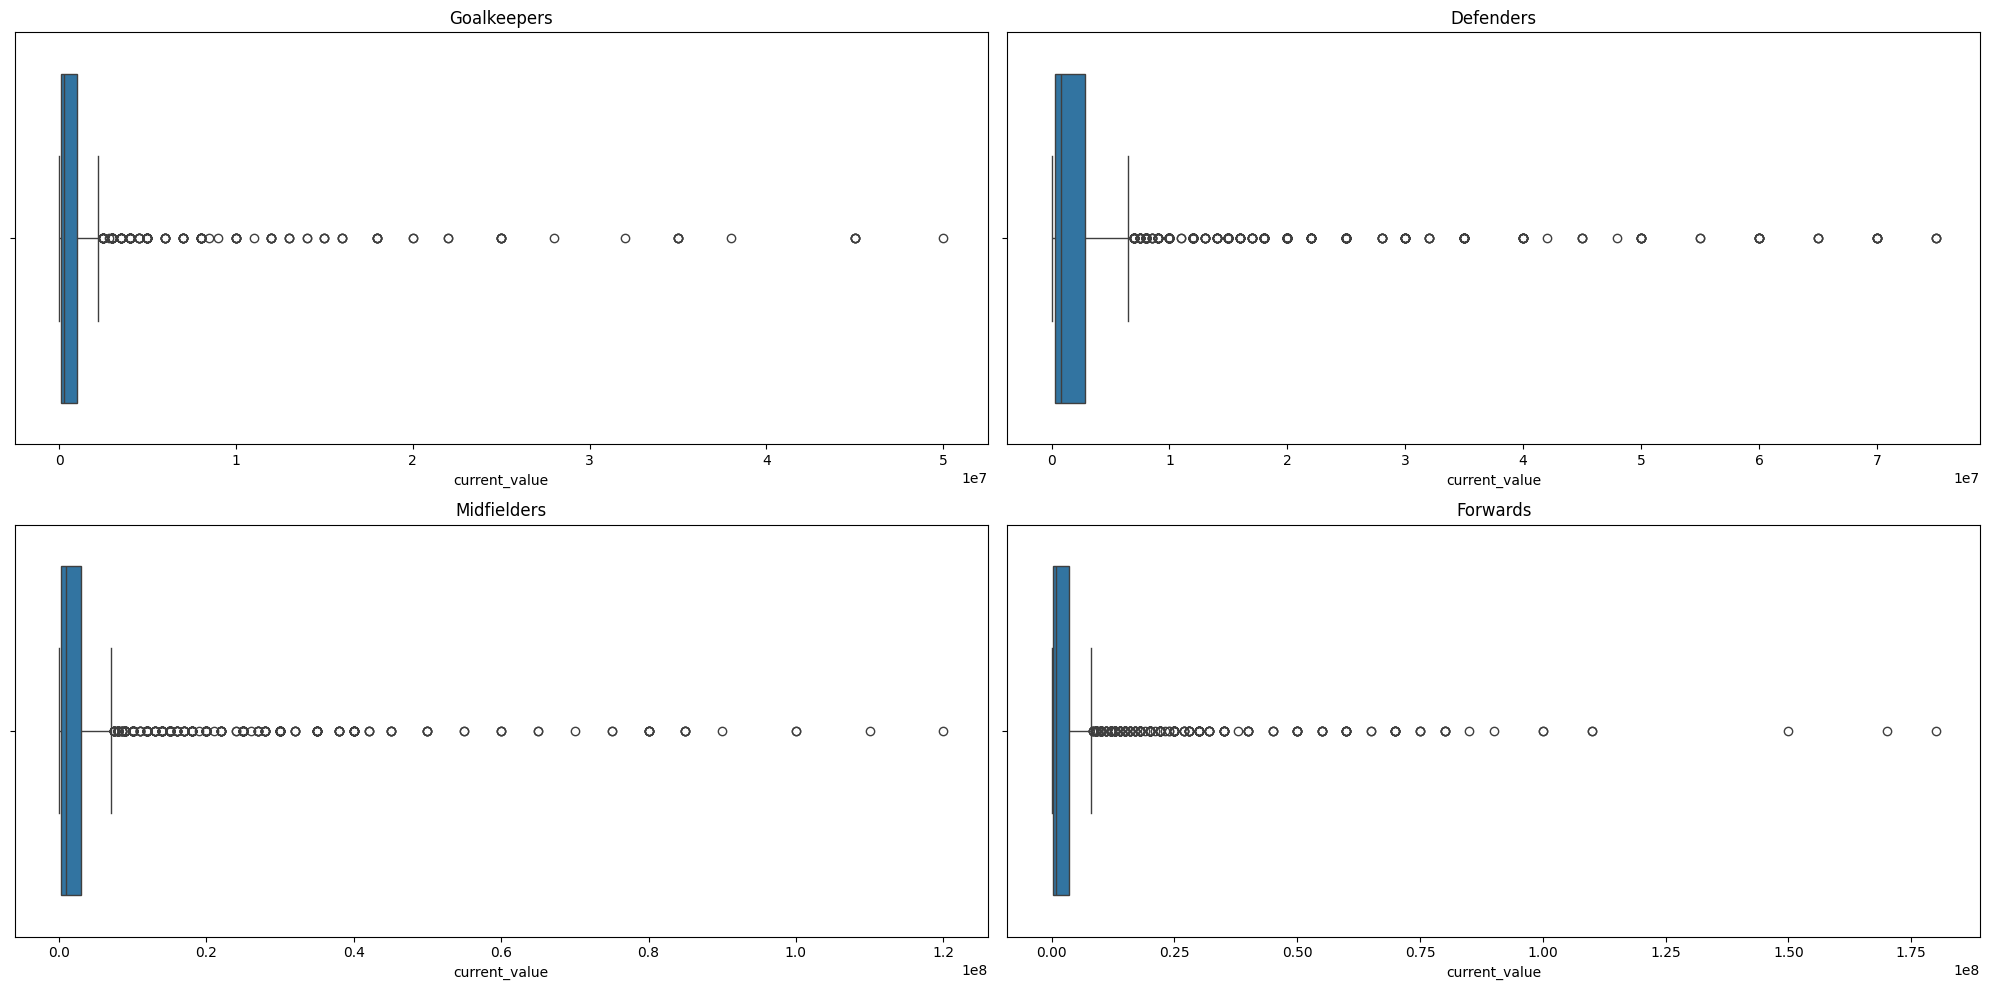

In [81]:
# Now we will check the distribution of the current value for each position
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

sns.boxplot(data=df_gk, x='current_value', ax=ax[0, 0])
ax[0, 0].set_title('Goalkeepers')

sns.boxplot(data=df_def, x='current_value', ax=ax[0, 1])
ax[0, 1].set_title('Defenders')

sns.boxplot(data=df_mid, x='current_value', ax=ax[1, 0])
ax[1, 0].set_title('Midfielders')

sns.boxplot(data=df_fwd, x='current_value', ax=ax[1, 1])
ax[1, 1].set_title('Forwards')

plt.tight_layout()
plt.show()

In [82]:
import numpy as np
from scipy.stats import zscore

# To handle outliers, we will split the data into 2 dataframes, one with the outliers and one without
df_outliers = df2[(np.abs(zscore(df2['current_value'])) > 3)]
df_no_outliers = df2[(np.abs(zscore(df2['current_value'])) <= 3)]

df_outliers.shape, df_no_outliers.shape


((203, 29), (10551, 29))

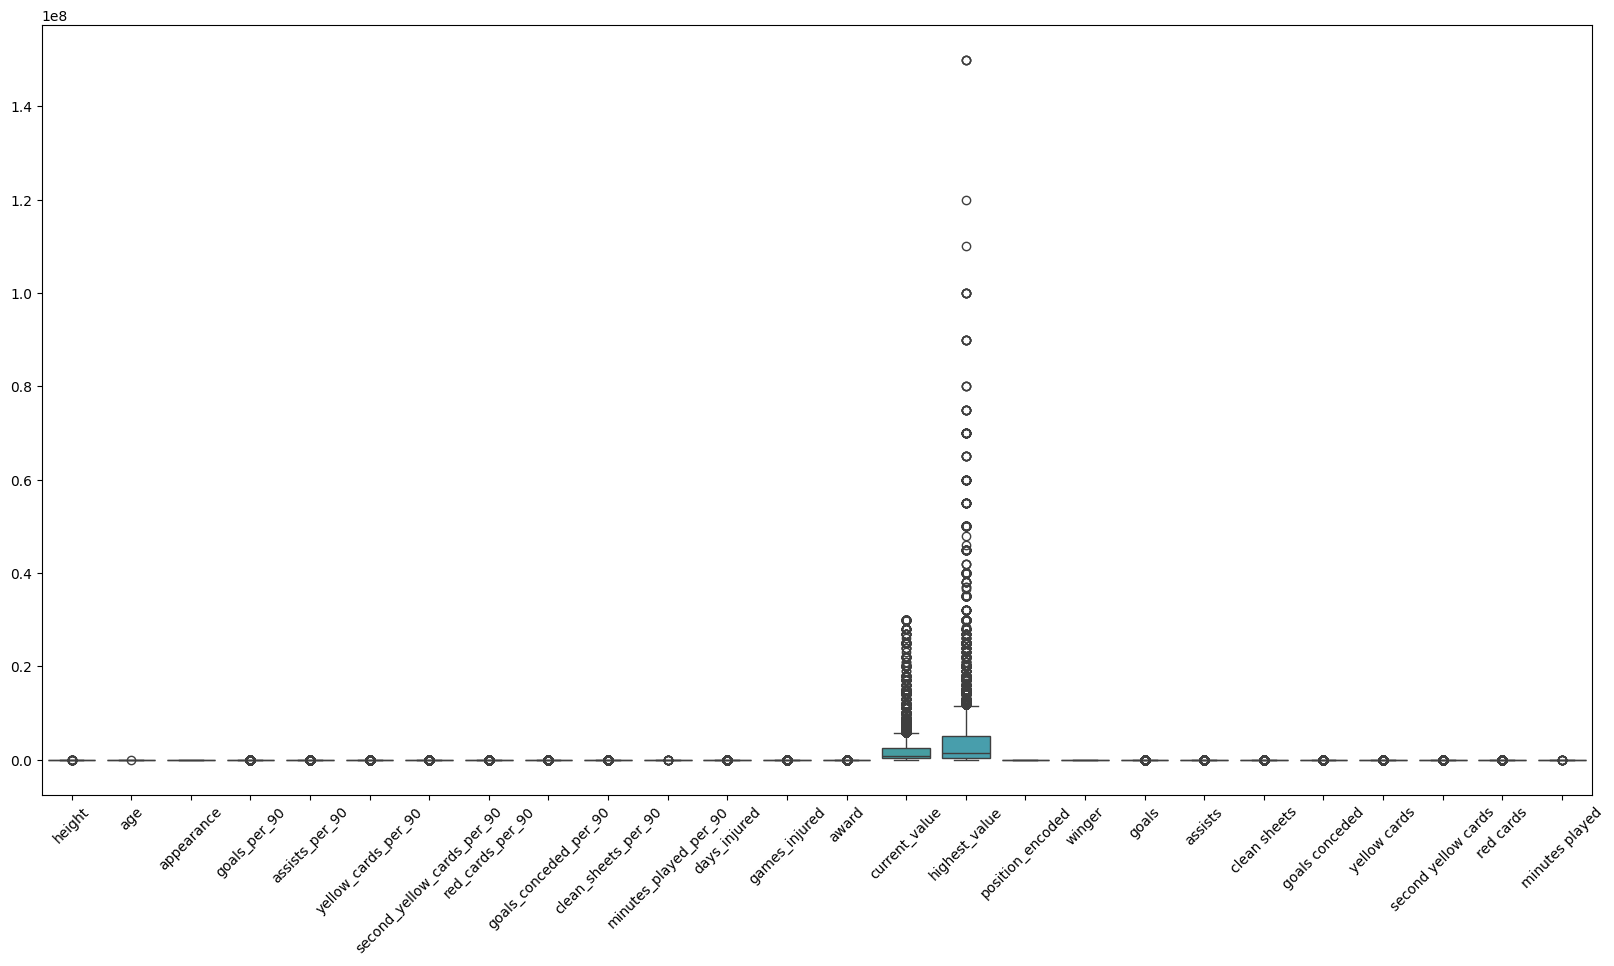

In [83]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=45)
plt.show()

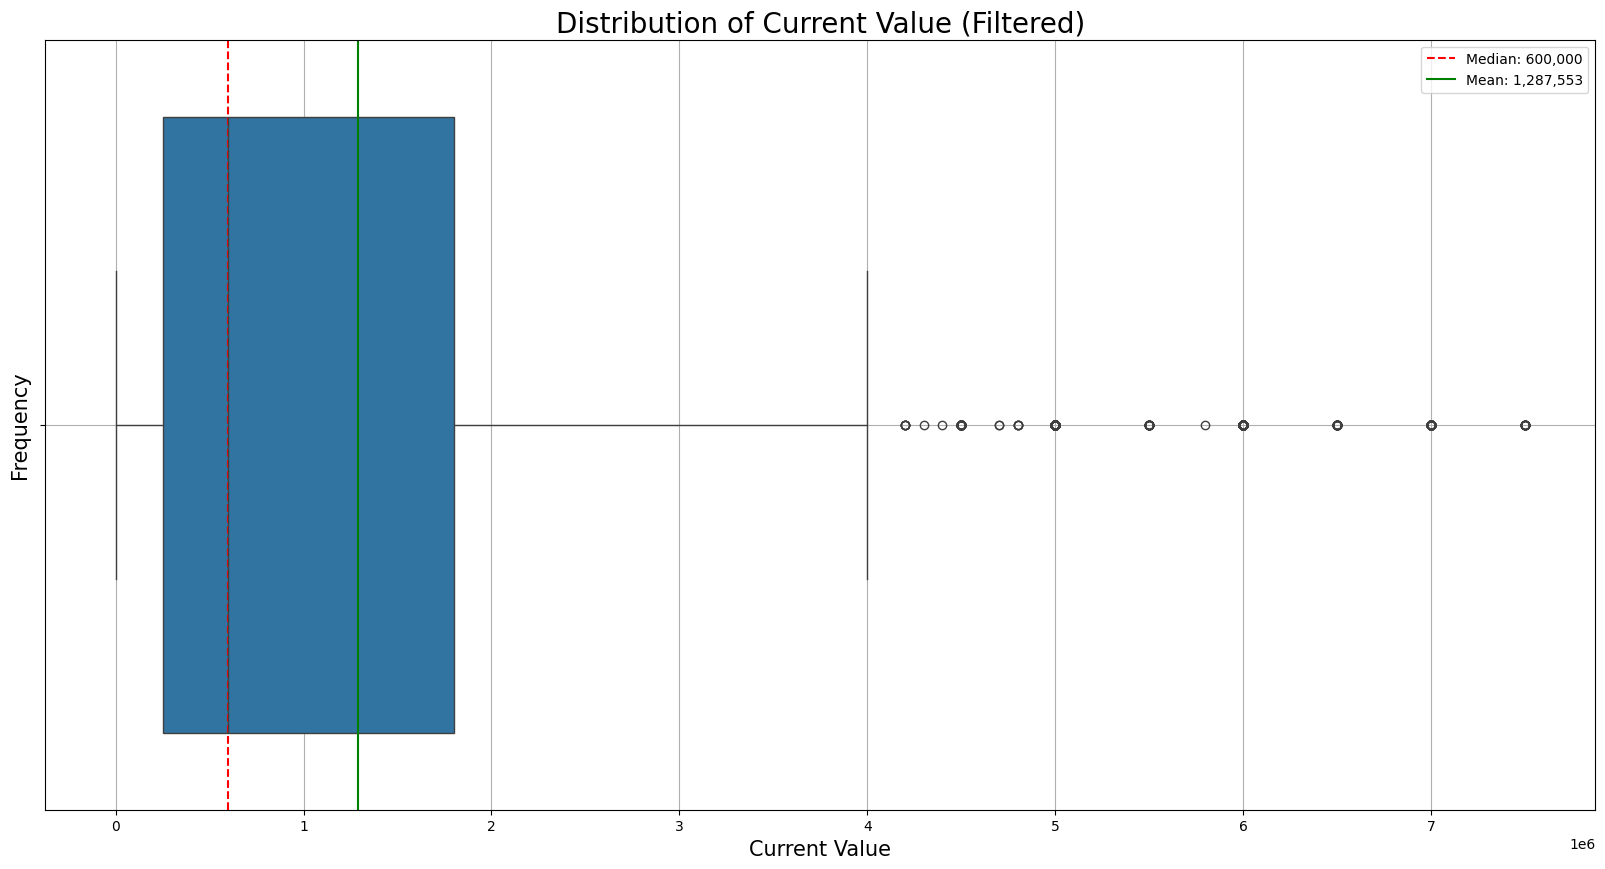

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and the boxplot
plt.figure(figsize=(20, 10))
box_plot = sns.boxplot(data=df_no_outliers[df_no_outliers['current_value'] < 8000000], x='current_value')

# Add title and labels
plt.title('Distribution of Current Value (Filtered)', fontsize=20)
plt.xlabel('Current Value', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Display grid lines for better readability
plt.grid(True)

# Calculate and display summary statistics
median = df_no_outliers[df_no_outliers['current_value'] < 8000000]['current_value'].median()
mean = df_no_outliers[df_no_outliers['current_value'] < 8000000]['current_value'].mean()

plt.axvline(median, color='r', linestyle='--', label=f'Median: {median:,.0f}')
plt.axvline(mean, color='g', linestyle='-', label=f'Mean: {mean:,.0f}')

# Display the legend
plt.legend()

# Show the plot
plt.show()


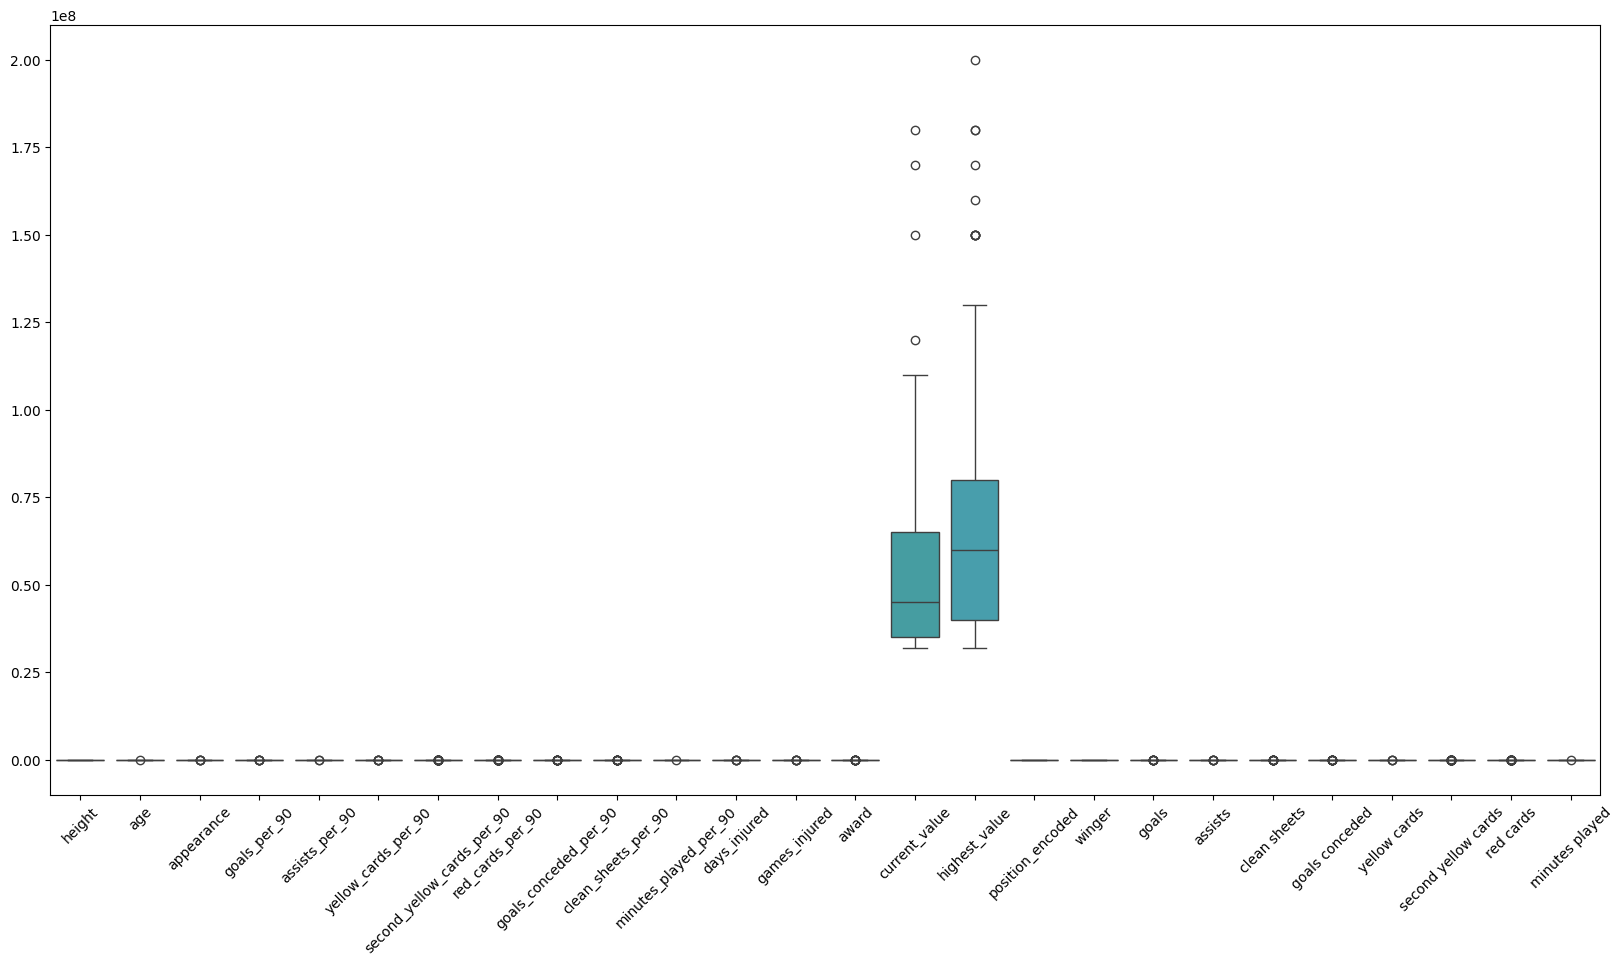

In [85]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_outliers)
plt.xticks(rotation=45)
plt.show()

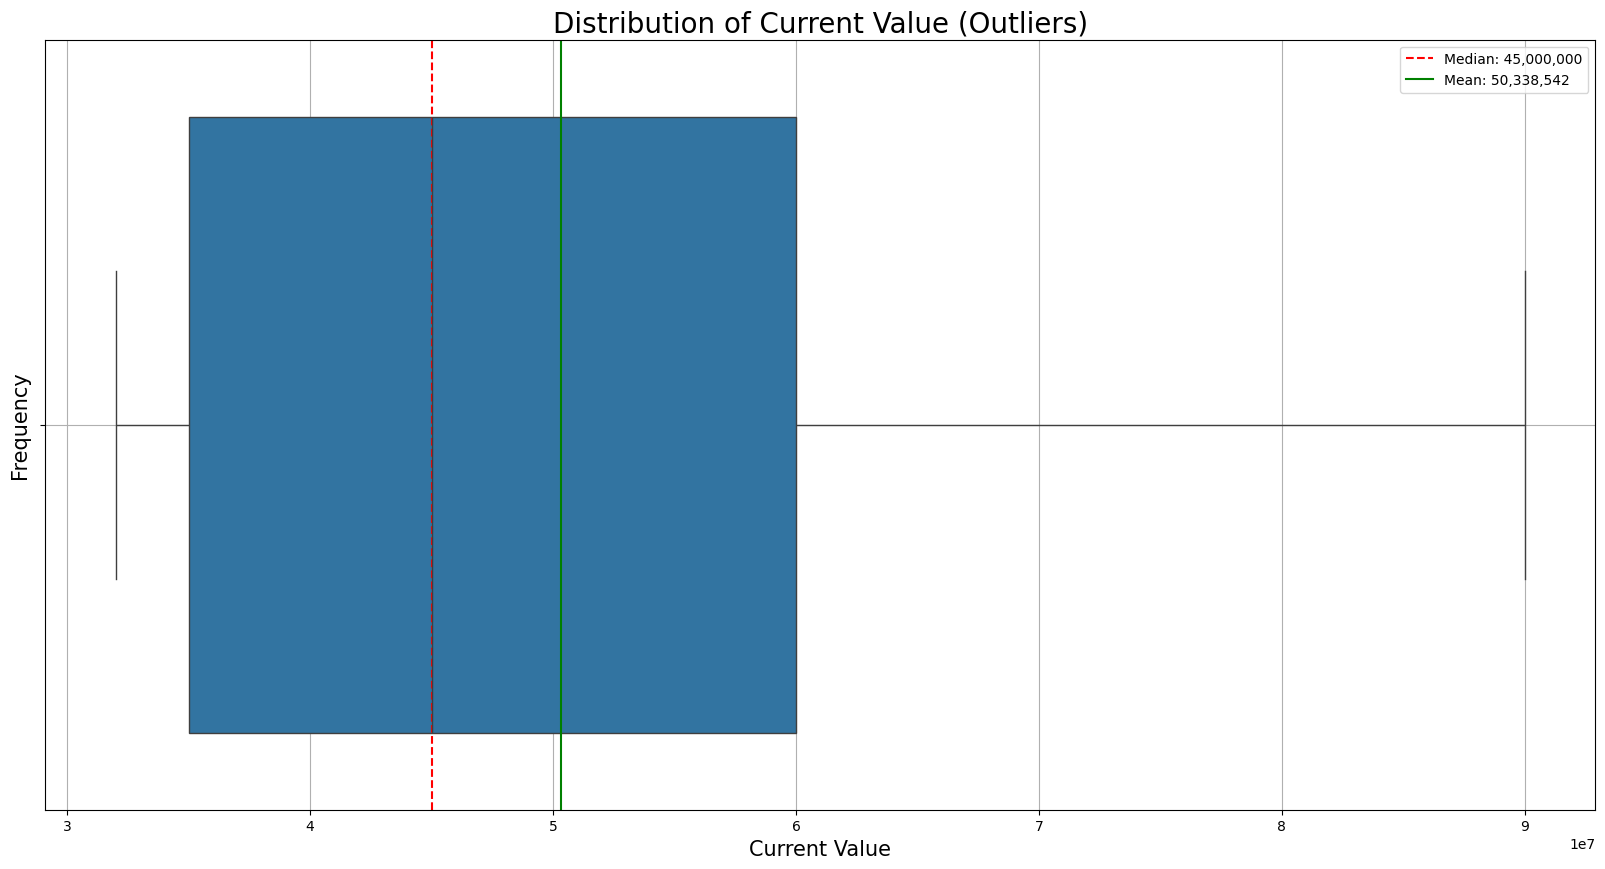

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and the boxplot
plt.figure(figsize=(20, 10))
box_plot = sns.boxplot(data=df_outliers[df_outliers['current_value'] < 100000000], x='current_value')

# Add title and labels
plt.title('Distribution of Current Value (Outliers)', fontsize=20)
plt.xlabel('Current Value', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Display grid lines for better readability
plt.grid(True)

# Calculate and display summary statistics
filtered_values = df_outliers[df_outliers['current_value'] < 100000000]['current_value']
median = filtered_values.median()
mean = filtered_values.mean()

plt.axvline(median, color='r', linestyle='--', label=f'Median: {median:,.0f}')
plt.axvline(mean, color='g', linestyle='-', label=f'Mean: {mean:,.0f}')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [87]:
df_gk_filtered = df_gk[(np.abs(zscore(df_gk['current_value'])) <= 3)]
df_def_filtered = df_def[(np.abs(zscore(df_def['current_value'])) <= 3)]
df_mid_filtered = df_mid[(np.abs(zscore(df_mid['current_value'])) <= 3)]
df_fwd_filtered = df_fwd[(np.abs(zscore(df_fwd['current_value'])) <= 3)]

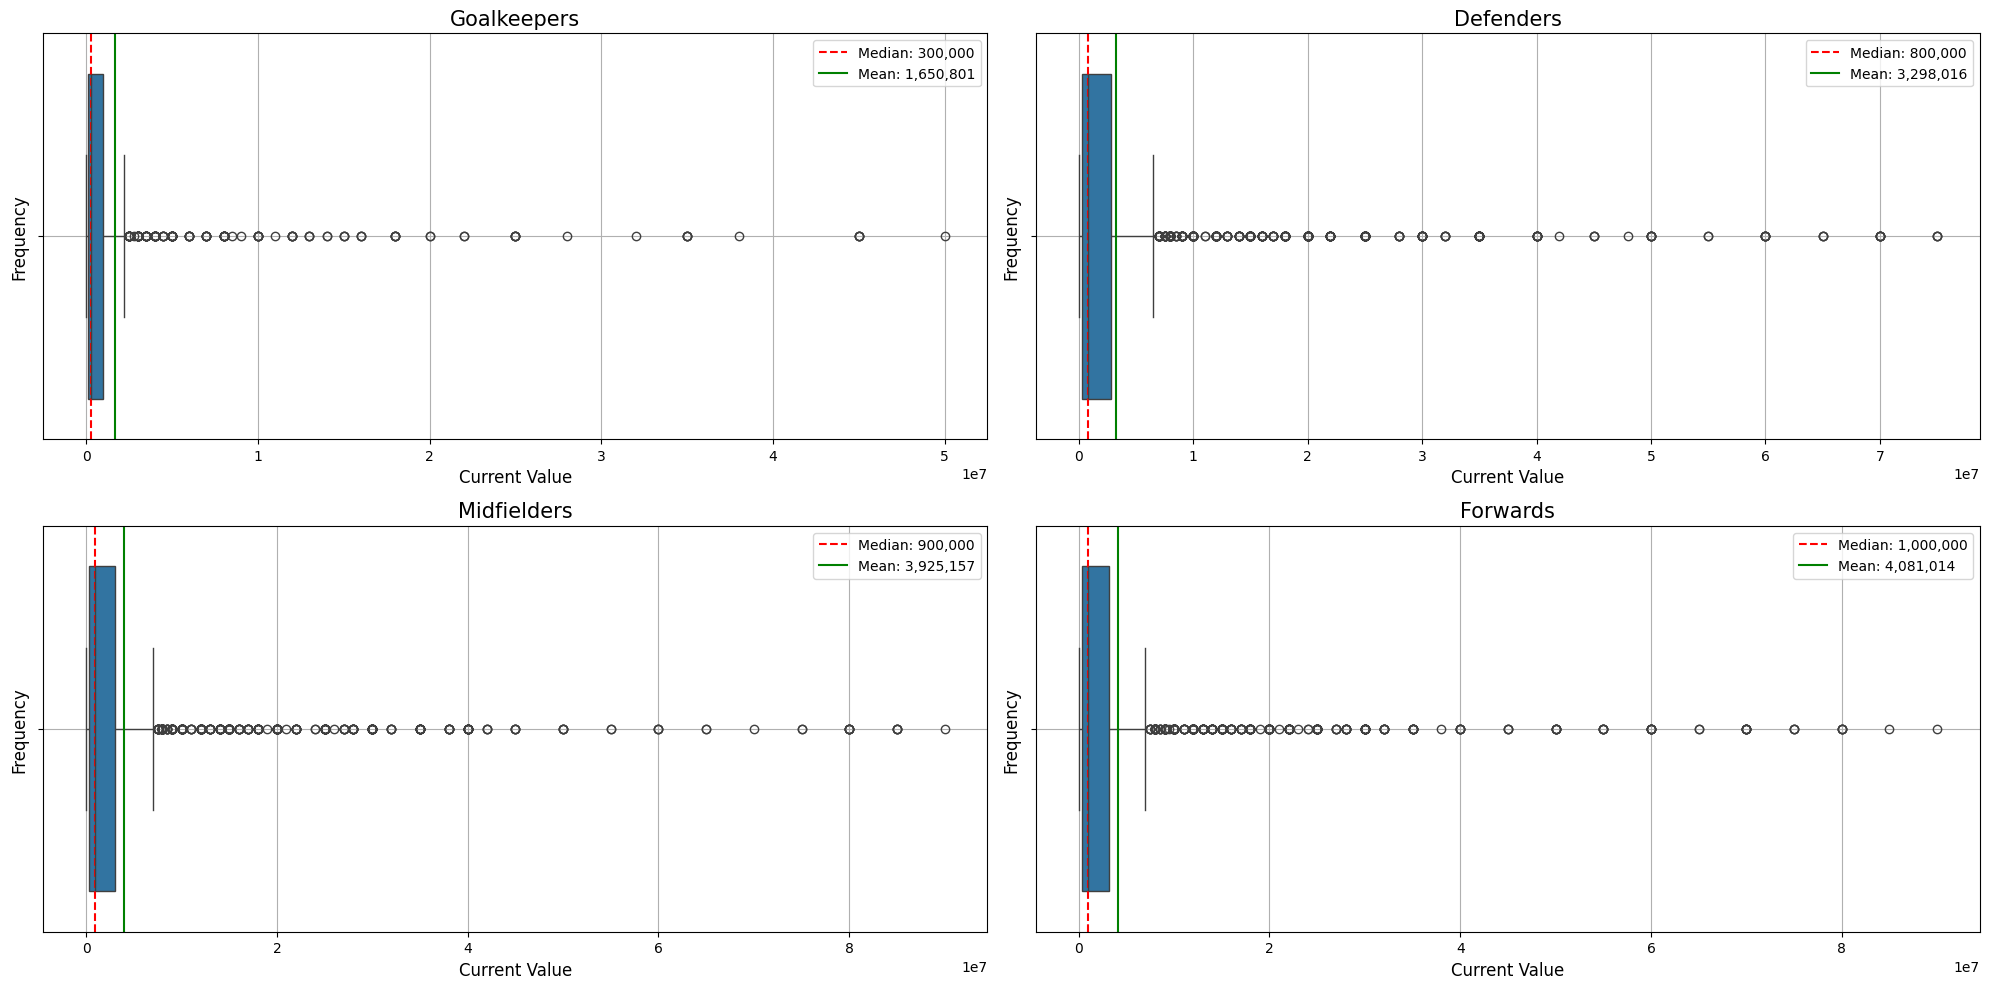

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the outliers
df_gk_no_outliers = df_gk[df_gk['current_value'] < 100000000]
df_def_no_outliers = df_def[df_def['current_value'] < 100000000]
df_mid_no_outliers = df_mid[df_mid['current_value'] < 100000000]
df_fwd_no_outliers = df_fwd[df_fwd['current_value'] < 100000000]

# Function to add details to each subplot
def add_details(ax, data, title):
    sns.boxplot(data=data, x='current_value', ax=ax)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Current Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True)

    # Calculate and display summary statistics
    median = data['current_value'].median()
    mean = data['current_value'].mean()

    ax.axvline(median, color='r', linestyle='--', label=f'Median: {median:,.0f}')
    ax.axvline(mean, color='g', linestyle='-', label=f'Mean: {mean:,.0f}')
    ax.legend()

# Now we will check the distribution of the current value for each position after filtering the outliers
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

add_details(ax[0, 0], df_gk_no_outliers, 'Goalkeepers')
add_details(ax[0, 1], df_def_no_outliers, 'Defenders')
add_details(ax[1, 0], df_mid_no_outliers, 'Midfielders')
add_details(ax[1, 1], df_fwd_no_outliers, 'Forwards')

plt.tight_layout()
plt.show()


## 3. Univariate Analysis: 


### 1. Univariate Graphical Analysis:


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

We will plot a bar chart to check the distribution of the positions in the dataset


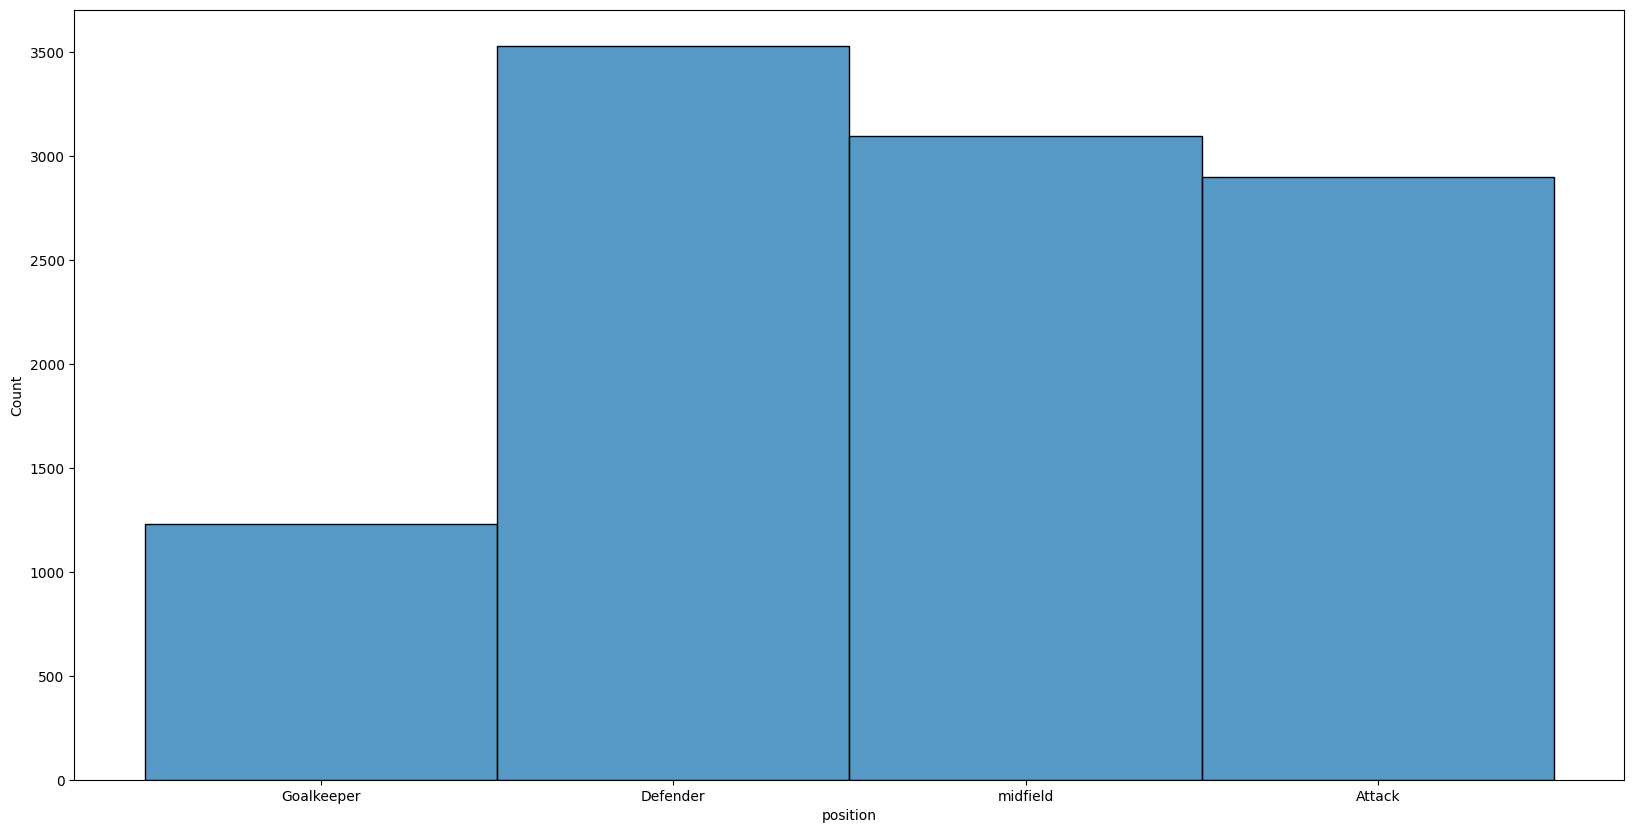

In [89]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df2, x='position')
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In addition to the plots we made in the check accuracy section, we will plot a histogram for the appearances column to check the distribution of the appearances in the dataset.

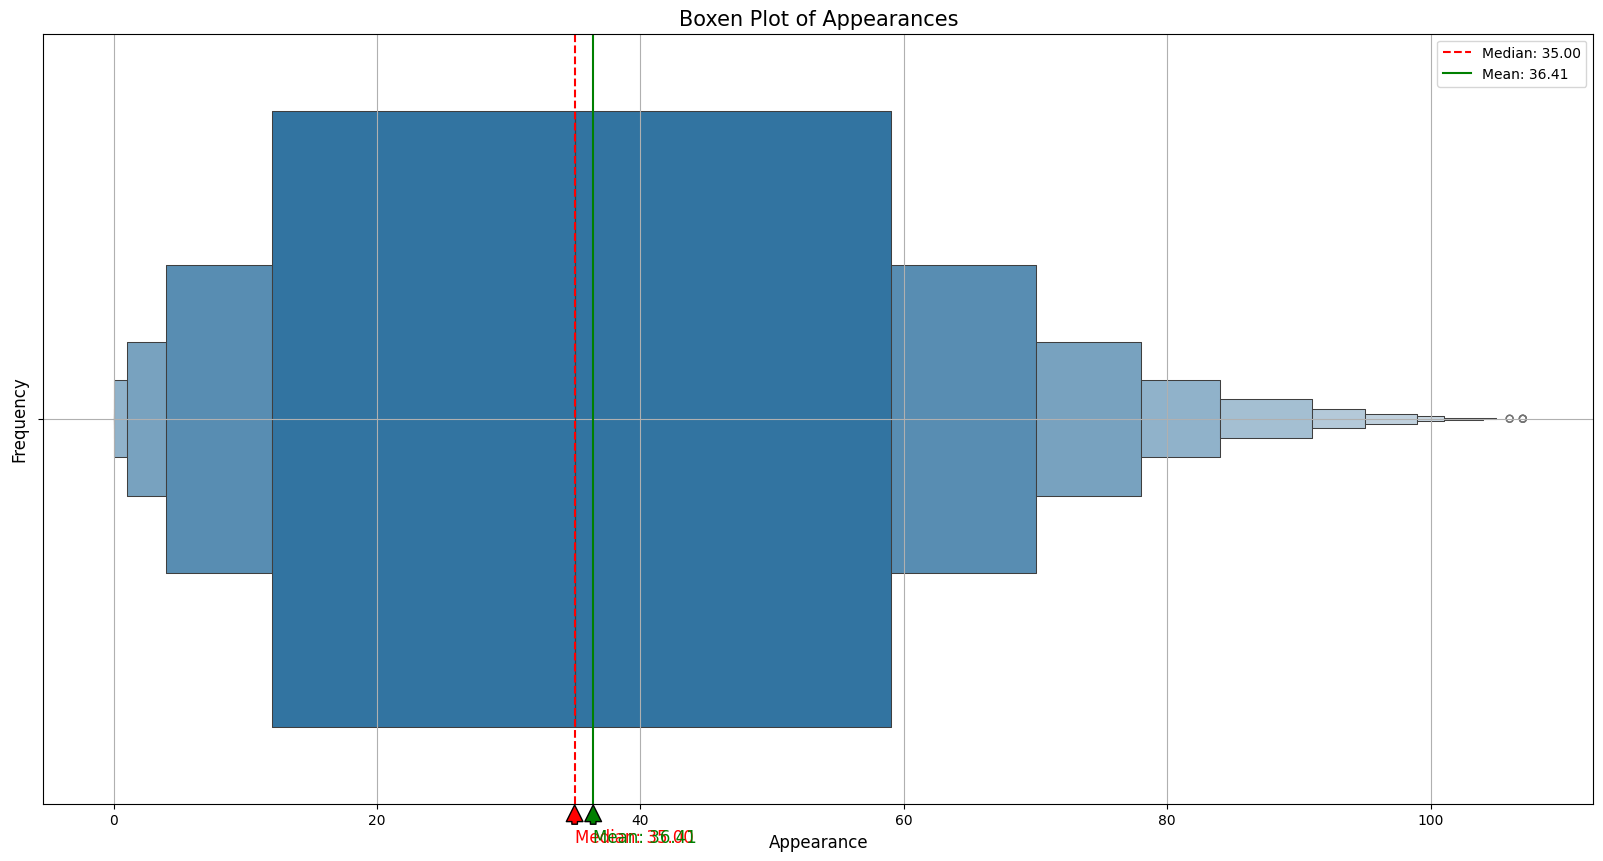

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to add detailed information to the boxen plot
def add_details(ax, data, title):
    sns.boxenplot(data=data, x='appearance', ax=ax)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Appearance', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True)

    # Calculate and display summary statistics
    median = data['appearance'].median()
    mean = data['appearance'].mean()

    ax.axvline(median, color='r', linestyle='--', label=f'Median: {median:.2f}')
    ax.axvline(mean, color='g', linestyle='-', label=f'Mean: {mean:.2f}')
    
    # Add annotations for median and mean
    ax.annotate(f'Median: {median:.2f}', xy=(median, 0.5), xytext=(median, 0.55),
                arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')
    ax.annotate(f'Mean: {mean:.2f}', xy=(mean, 0.5), xytext=(mean, 0.55),
                arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, color='green')
    
    # Display the legend
    ax.legend()

# Create the figure
plt.figure(figsize=(20, 10))
ax = plt.gca()

# Add details to the plot
add_details(ax, df, 'Boxen Plot of Appearances')

# Show the plot
plt.show()


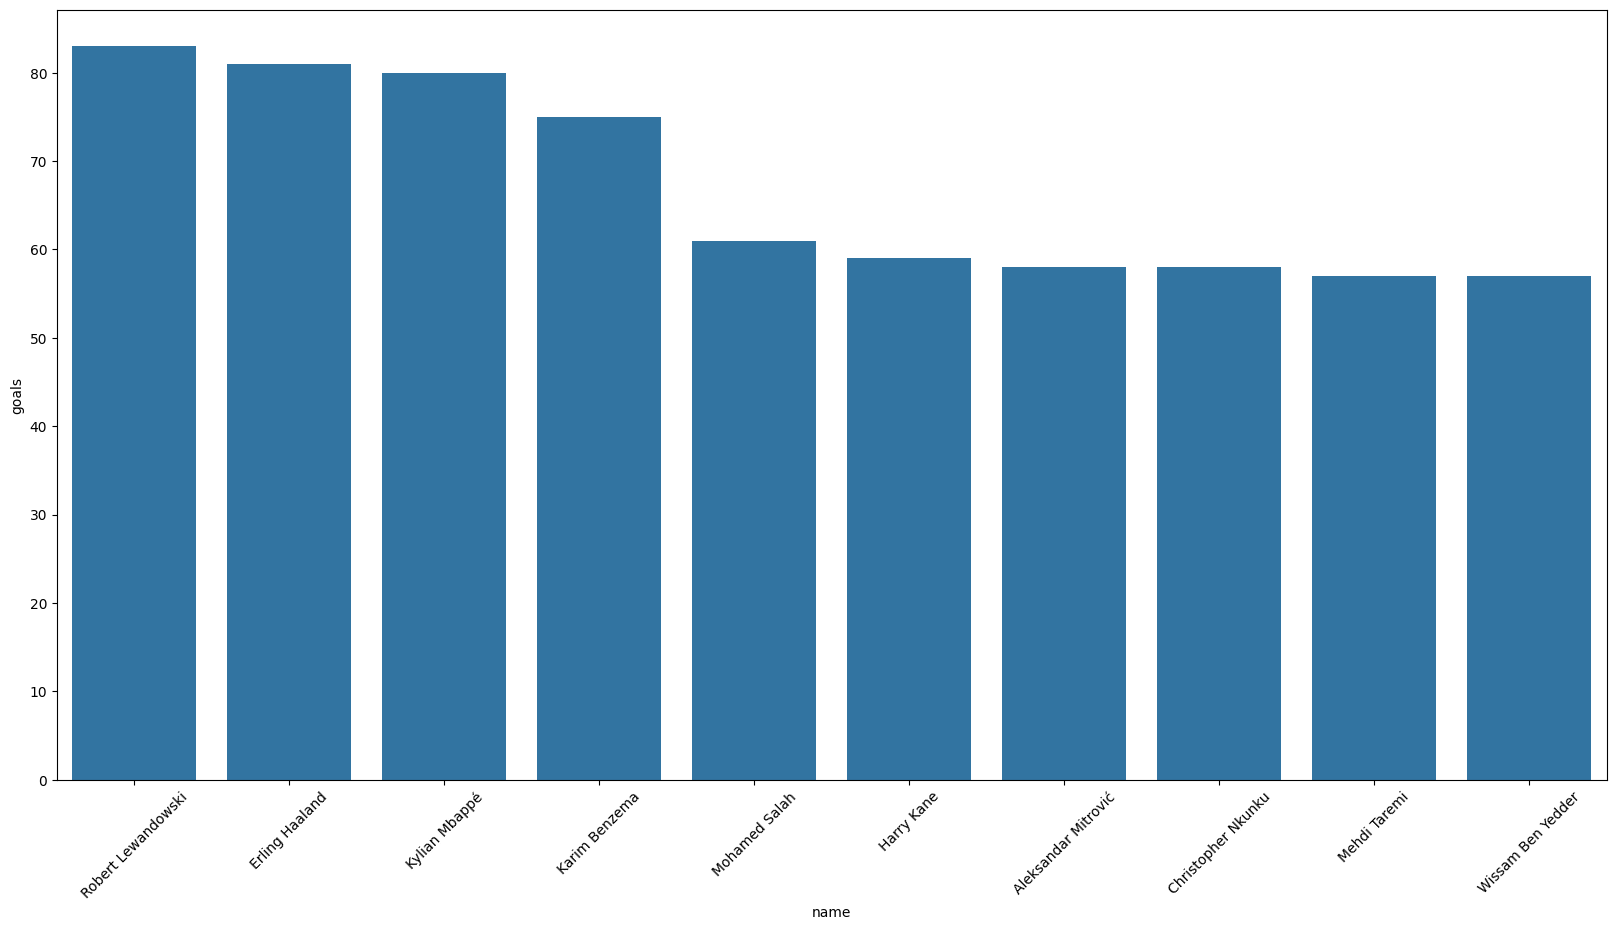

In [91]:
top_10_goals = df2.sort_values(by='goals', ascending=False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_goals, x='name', y='goals')
plt.xticks(rotation=45)
plt.show()

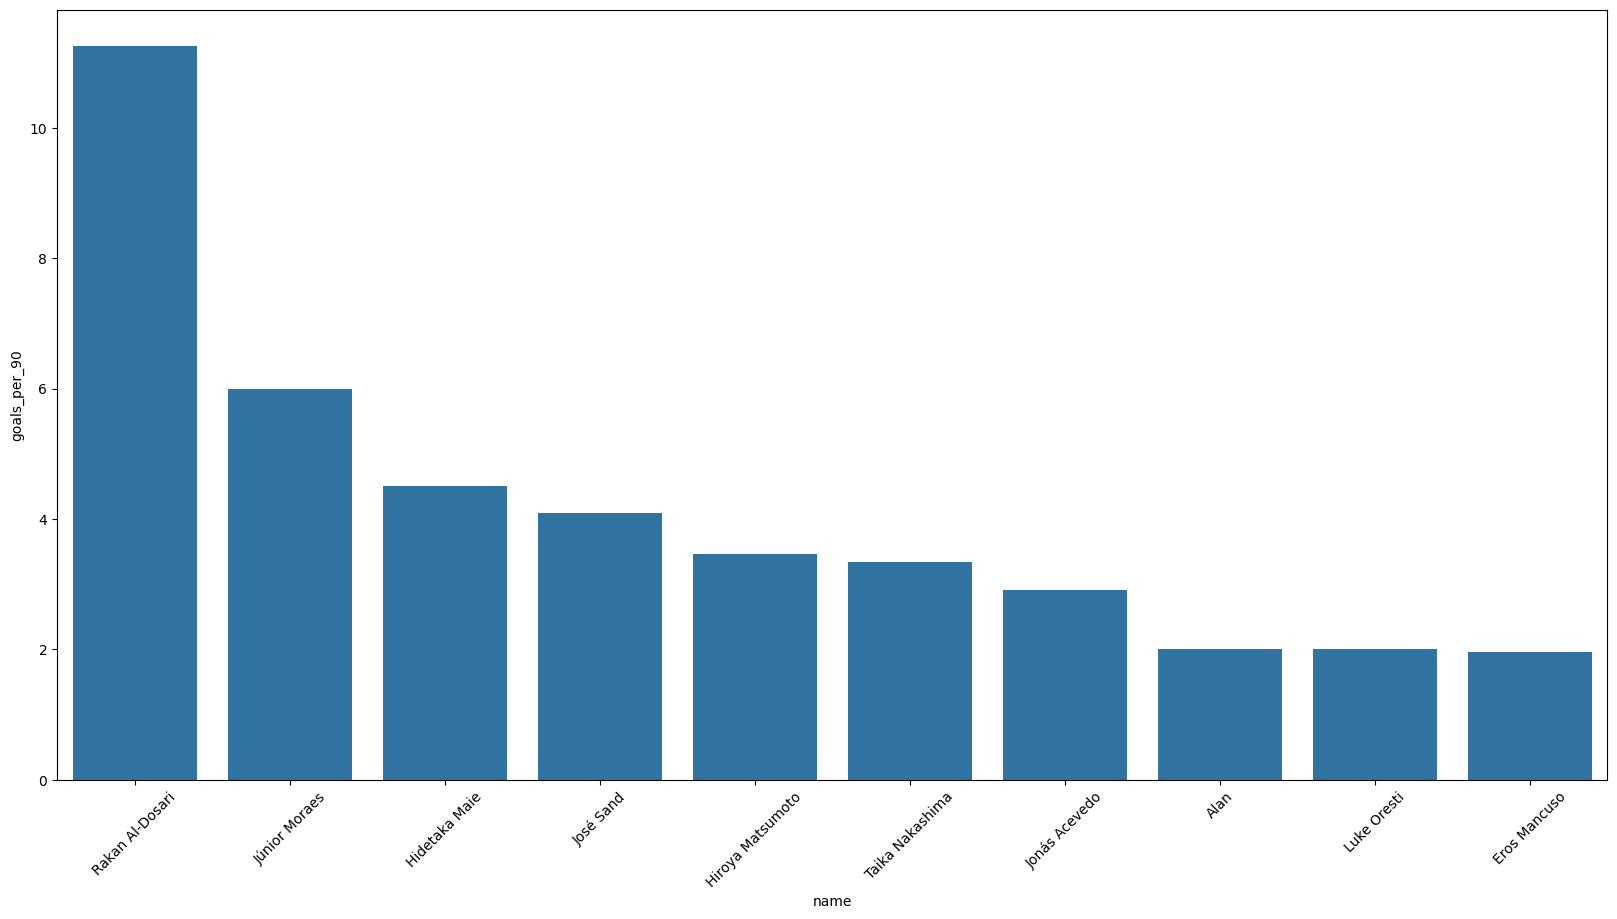

In [92]:
top_10_goals = df2.sort_values(by='goals_per_90', ascending=False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_goals, x='name', y='goals_per_90')
plt.xticks(rotation=45)
plt.show()

We can see the the number of goals and goals per 90 is different.

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [93]:
df.iloc[:, 0:14].describe()

,height,age,appearance,goals_per_90,assists_per_90,yellow_cards_per_90,second_yellow_cards_per_90,red_cards_per_90,goals_conceded_per_90,clean_sheets_per_90,minutes_played_per_90
count,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000
mean,181.240,26.042,36.407,0.126,0.087,0.190,0.005,0.007,0.132,0.045,2470.789
std,6.970,4.778,26.527,0.236,0.143,0.432,0.025,0.081,0.442,0.924,2021.703
min,156.000,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,176.000,22.000,12.000,0.000,0.000,0.053,0.000,0.000,0.000,0.000,660.000
50%,181.240,26.000,35.000,0.046,0.041,0.150,0.000,0.000,0.000,0.000,2101.500
75%,186.000,29.000,59.000,0.172,0.133,0.248,0.000,0.000,0.000,0.000,3968.000
max,206.000,43.000,107.000,11.250,4.000,30.000,1.000,6.923,9.000,90.000,9510.000


In [94]:
df.iloc[:, 14:].describe()

,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,goals,assists,clean sheets,goals conceded,yellow cards,second yellow cards,red cards,minutes played
count,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000
mean,117.962,15.826,1.961,3622970.988,6152606.007,2.713,0.308,3.716,2.649,0.813,3.572,4.824,0.122,0.143,2470.789
std,175.207,23.384,3.744,9095409.878,13389876.391,0.986,0.461,6.576,4.138,3.598,14.683,4.955,0.371,0.408,2021.703
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,300000.000,450000.000,2.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,660.000
50%,37.000,5.000,1.000,800000.000,1500000.000,3.000,0.000,1.000,1.000,0.000,0.000,3.000,0.000,0.000,2101.500
75%,181.000,24.000,2.000,3000000.000,5000000.000,4.000,1.000,4.000,4.000,0.000,0.000,8.000,0.000,0.000,3968.000
max,2349.000,339.000,92.000,180000000.000,200000000.000,4.000,1.000,83.000,45.000,46.000,155.000,35.000,4.000,4.000,9510.000


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & numerical --> (scatter plot, histogram, box plot)**

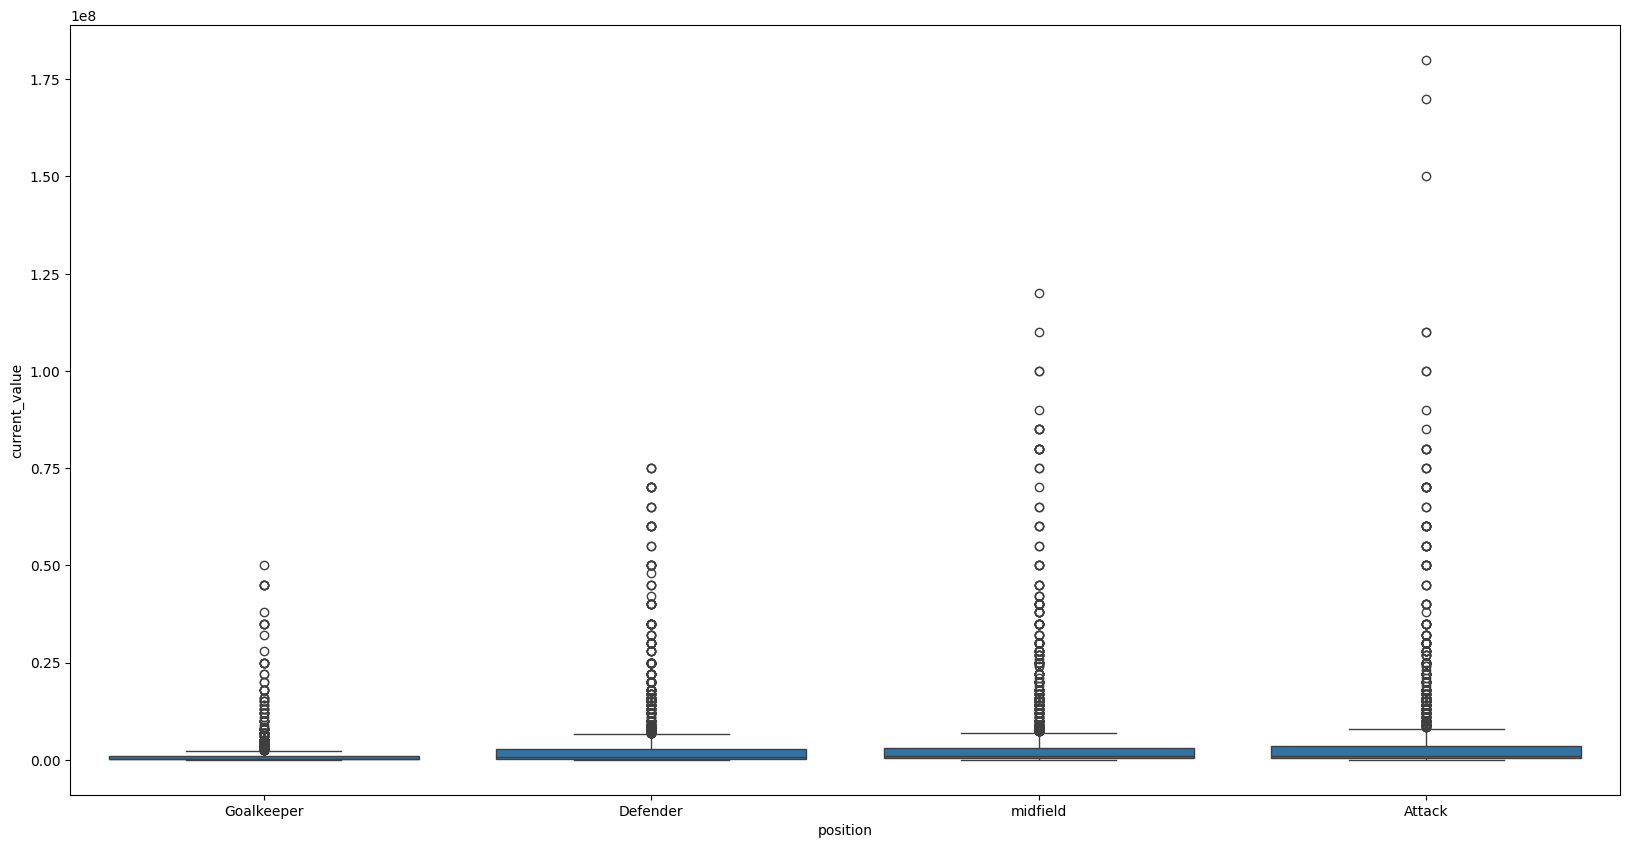

In [95]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df2, x='position', y='current_value')
plt.show()

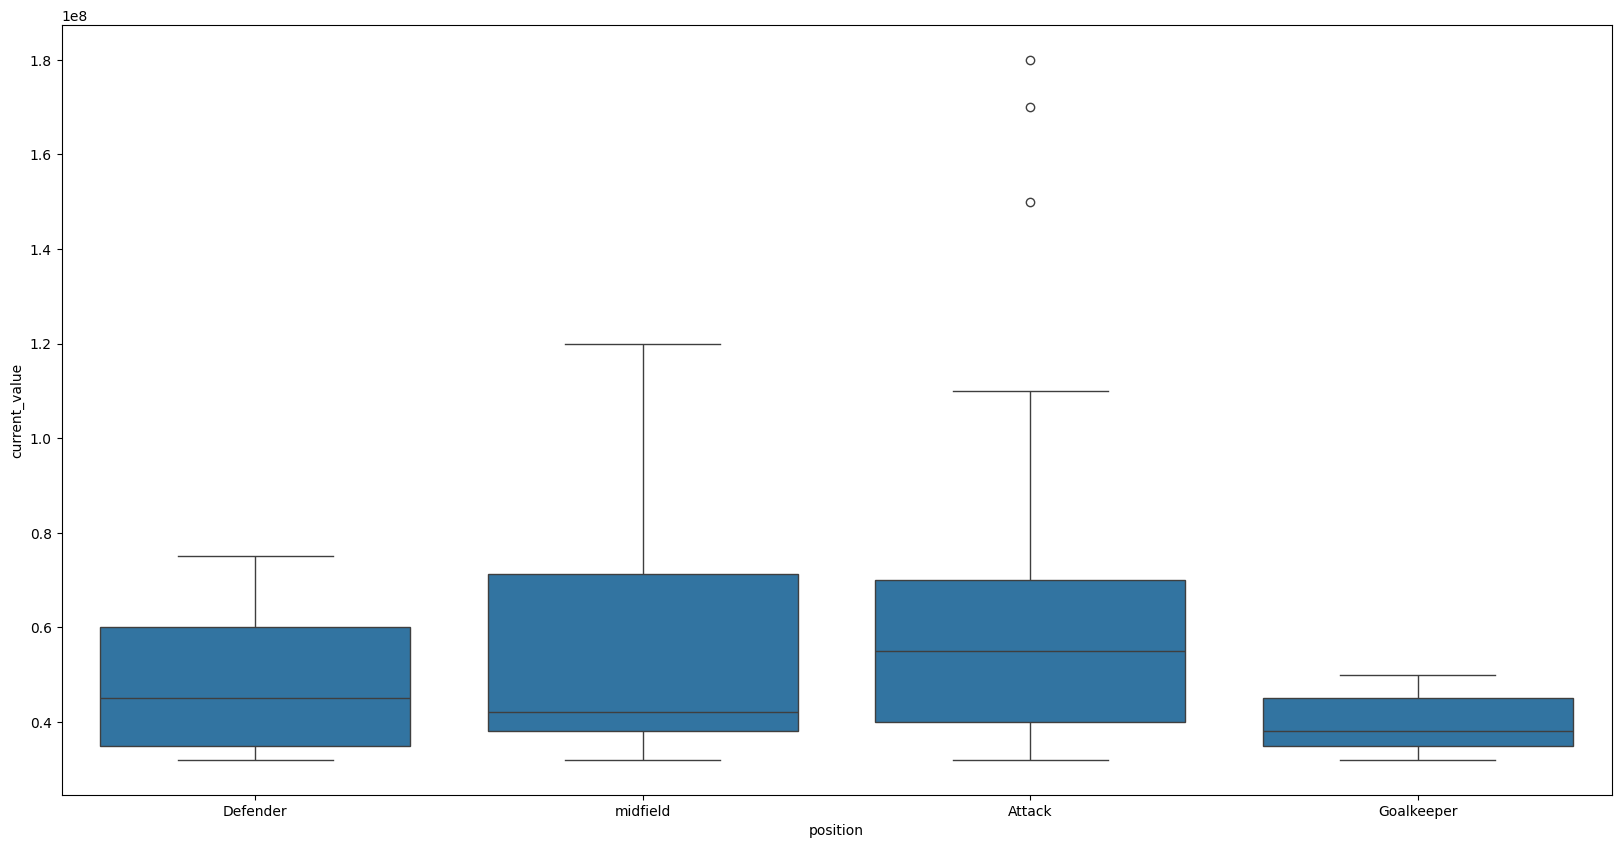

In [96]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_outliers, x='position', y='current_value')
plt.show()

We can see that the outliers df divided by the position showing a balanced distribution. 

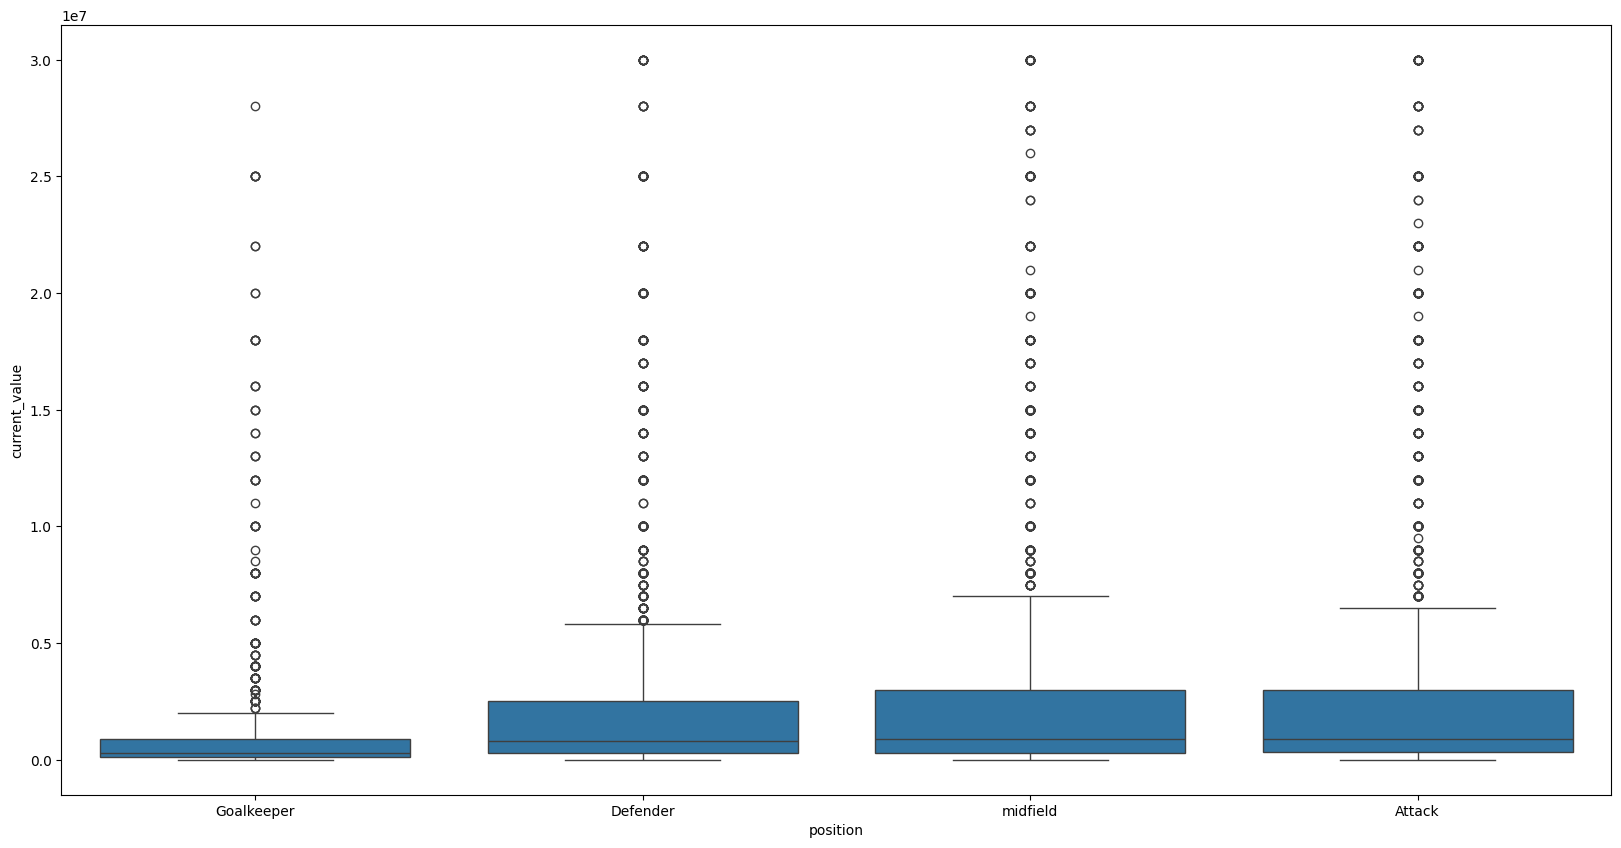

In [97]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers, x='position', y='current_value')
plt.show()

We can see that after removing the outliers, the distribution of the data is still not balanced. However for now we will move on with it.

In [98]:
df_corr = df2.copy()
current_value = df_corr.pop('current_value')
df_corr.insert(0, 'current_value', current_value)
df_corr.head()

,current_value,team,name,position,height,age,appearance,goals_per_90,assists_per_90,yellow_cards_per_90,...,position_encoded,winger,goals,assists,clean sheets,goals conceded,yellow cards,second yellow cards,red cards,minutes played
0,15000000,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,...,1,0,0.000,0.000,35.000,127.000,1.000,0.000,0.000,9390
1,1500000,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,...,1,0,0.000,0.000,3.000,18.000,1.000,0.000,0.000,1304
2,600000,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,...,1,0,0.000,0.000,3.000,2.000,0.000,0.000,0.000,292
3,50000000,Manchester United,Lisandro Martínez,Defender,175.000,25.000,82,0.028,0.056,0.225,...,2,0,2.000,4.000,0.000,0.000,16.000,0.000,0.000,6408
4,40000000,Manchester United,Raphaël Varane,Defender,191.000,30.000,63,0.018,0.018,0.054,...,2,0,1.000,1.000,0.000,0.000,3.000,0.000,0.000,5031


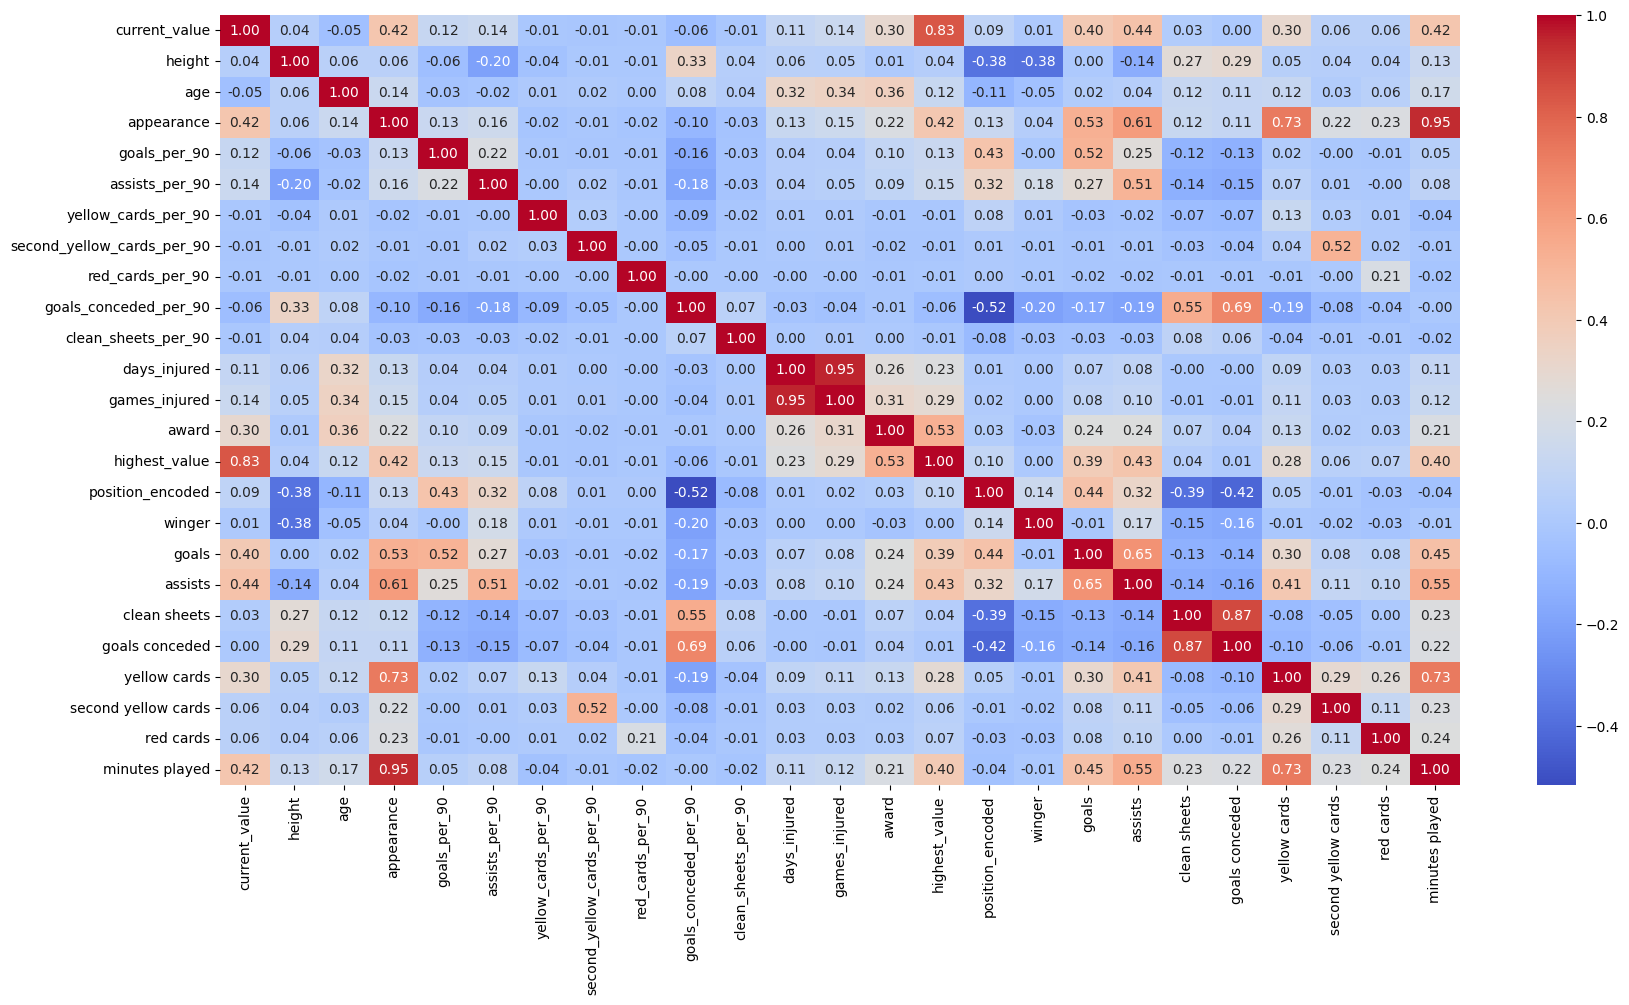

In [99]:
df_numeric = df_corr.select_dtypes(include=[np.number])  
df_numeric = df_numeric.drop(['minutes_played_per_90'], axis=1)
corr_matrix = df_numeric.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

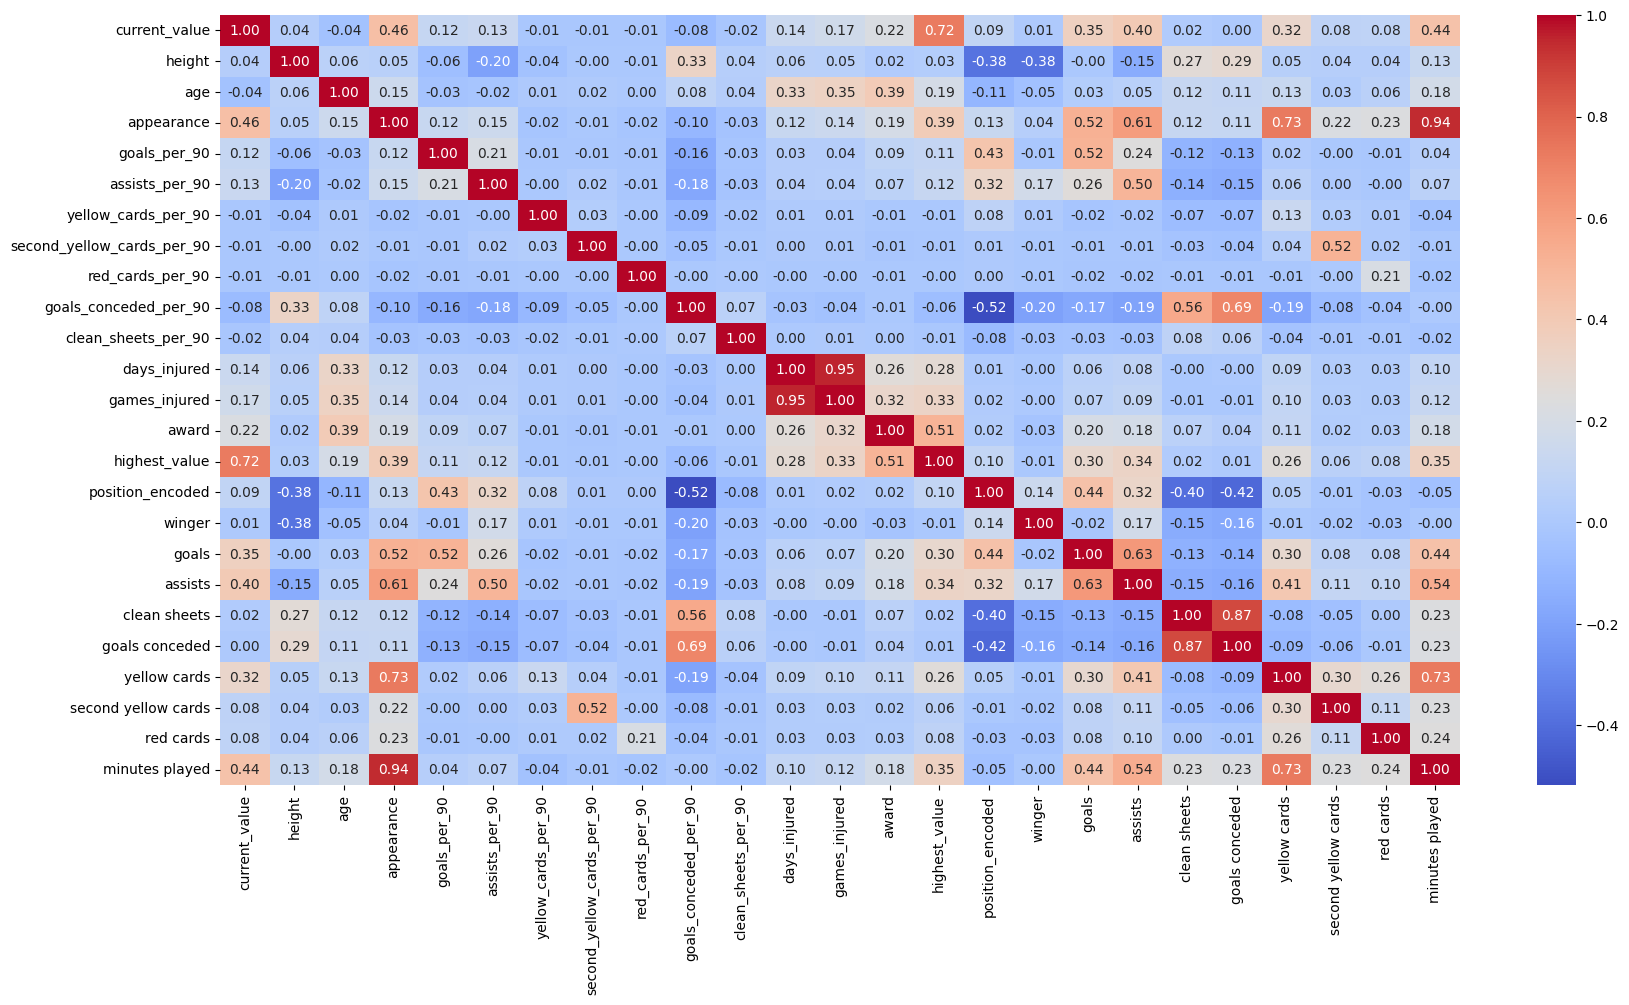

In [100]:
import numpy as np
df_corr = df_no_outliers.copy()
current_value = df_corr.pop('current_value')
df_corr.insert(0, 'current_value', current_value)
df_numeric = df_corr.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop(['minutes_played_per_90'], axis=1)
corr_matrix = df_numeric.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


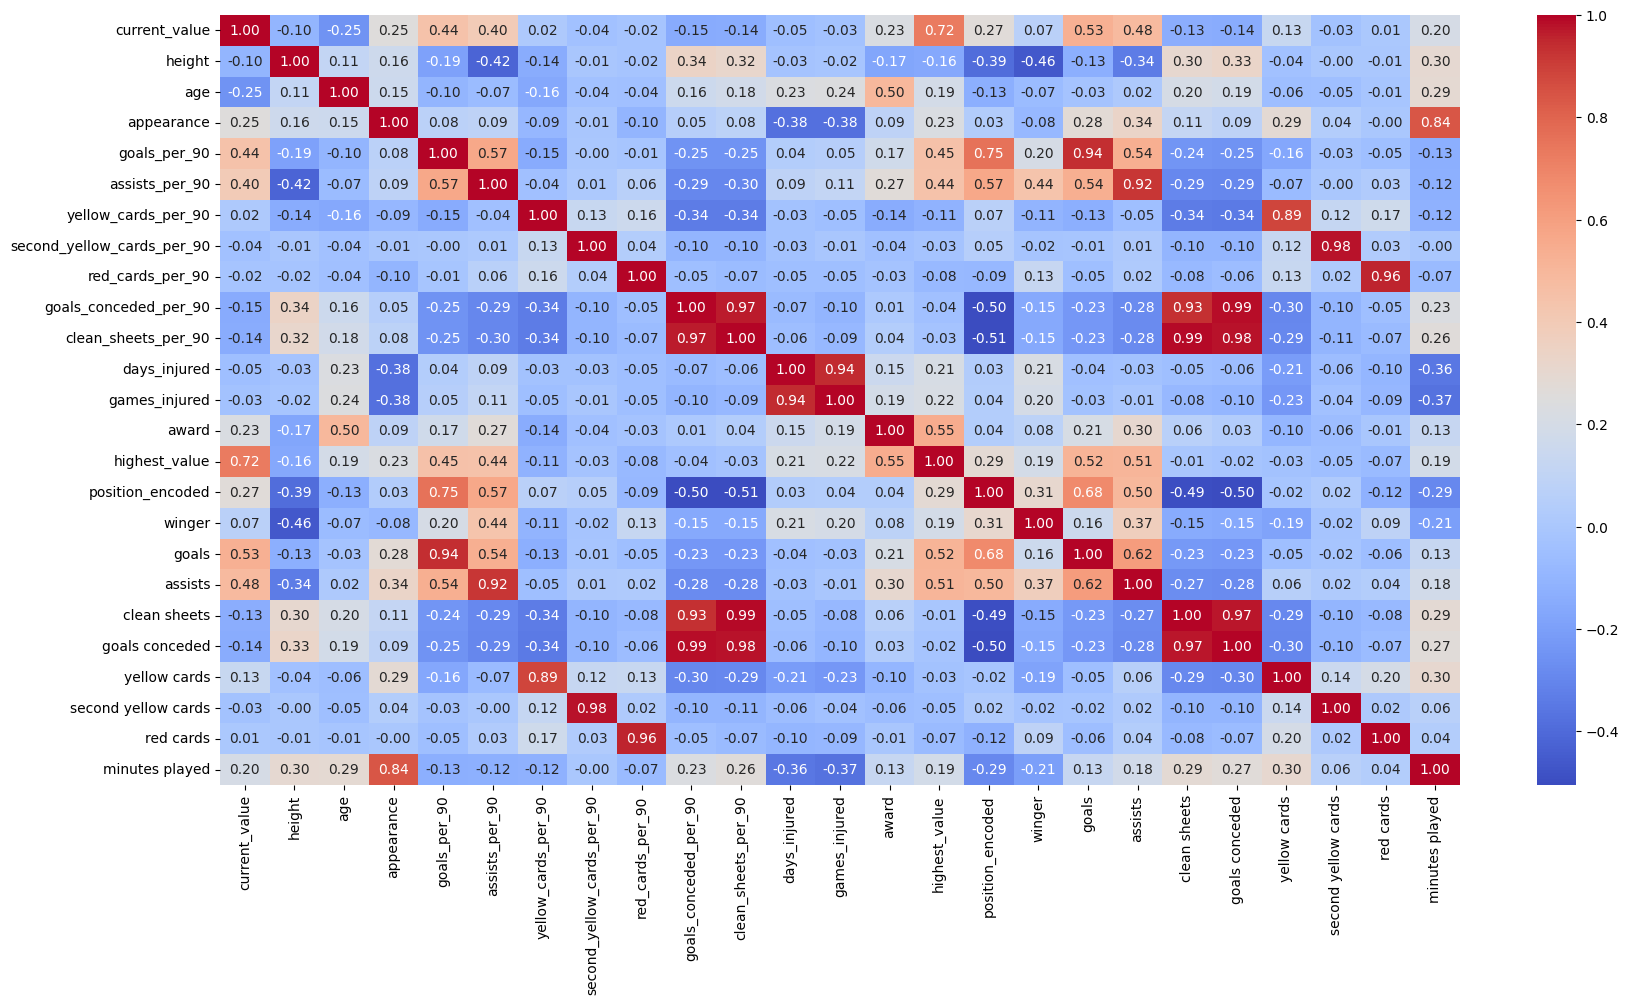

In [101]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df_outliers.copy()
current_value = df_corr.pop('current_value')
df_corr.insert(0, 'current_value', current_value)
df_numeric = df_corr.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop(['minutes_played_per_90'], axis=1)
corr_matrix = df_numeric.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


We can see that the per90 columns are highly correlated with the actual columns. So we will choose to move forward with the actual columns.

In [102]:
df_outliers = df_outliers.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90'], axis=1)
df_no_outliers = df_no_outliers.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90'], axis=1)

Now we will convert the positions to numerical values. To consider it in the correlation matrix.

In [103]:
df_outliers = pd.get_dummies(df_outliers, columns=['position']).drop(['position_encoded'], axis=1)
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['position']).drop(['position_encoded'], axis=1)
df_outliers.columns

Index(['team', 'name', 'height', 'age', 'appearance', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value', 'winger',
       'goals', 'assists', 'clean sheets', 'goals conceded', 'yellow cards',
       'second yellow cards', 'red cards', 'minutes played', 'position_Attack',
       'position_Defender', 'position_Goalkeeper', 'position_midfield'],
      dtype='object')

Now we will check the correlation again.

In [104]:
import numpy as np
import pandas as pd
df_numeric = df_outliers.select_dtypes(include=[np.number])
correlation = df_numeric.corr()
print(correlation['current_value'].sort_values(ascending=False))


current_value          1.000
highest_value          0.724
goals                  0.534
assists                0.483
appearance             0.254
award                  0.227
minutes played         0.201
yellow cards           0.131
winger                 0.069
red cards              0.006
games_injured         -0.030
second yellow cards   -0.032
days_injured          -0.051
height                -0.102
clean sheets          -0.135
goals conceded        -0.143
age                   -0.248
Name: current_value, dtype: float64


In [105]:
import numpy as np
import pandas as pd
df_numeric = df_no_outliers.select_dtypes(include=[np.number])
correlation = df_numeric.corr()
print(correlation['current_value'].sort_values(ascending=False))


current_value          1.000
highest_value          0.724
appearance             0.460
minutes played         0.442
assists                0.400
goals                  0.354
yellow cards           0.316
award                  0.221
games_injured          0.167
days_injured           0.138
red cards              0.083
second yellow cards    0.079
height                 0.039
clean sheets           0.020
winger                 0.009
goals conceded         0.004
age                   -0.043
Name: current_value, dtype: float64


We will check the correlation matrix for the 4 positions datasets

In [106]:
# We will drop the minutes played column because as we have seen above, it is highly correlated with appearance
df_gk = df_gk.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_def = df_def.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_mid = df_mid.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_fwd = df_fwd.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_gk_filtered = df_gk_filtered.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_def_filtered = df_def_filtered.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_mid_filtered = df_mid_filtered.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_fwd_filtered = df_fwd_filtered.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)

In [107]:
import numpy as np
import pandas as pd
df_numeric_gk = df_gk.select_dtypes(include=[np.number])
correlation_gk = df_numeric_gk.corr()
print(correlation_gk['current_value'].sort_values(ascending=False))


current_value          1.000
highest_value          0.852
clean sheets           0.532
appearance             0.484
goals conceded         0.400
yellow cards           0.280
award                  0.267
height                 0.128
games_injured          0.092
days_injured           0.087
red cards              0.037
second yellow cards    0.020
age                    0.013
goals                 -0.010
position_encoded         NaN
assists                  NaN
Name: current_value, dtype: float64


In [108]:
import numpy as np
import pandas as pd
df_numeric_gk_filtered = df_gk_filtered.select_dtypes(include=[np.number])
correlation = df_numeric_gk_filtered.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value         1.000
highest_value         0.715
clean sheets          0.516
appearance            0.510
goals conceded        0.454
yellow cards          0.314
award                 0.212
games_injured         0.154
days_injured          0.137
height                0.114
red cards             0.098
age                   0.054
second yellow cards   0.027
goals                 0.002
position_encoded        NaN
assists                 NaN
Name: current_value, dtype: float64


In [109]:
import numpy as np
import pandas as pd
df_numeric_def = df_def.select_dtypes(include=[np.number])
correlation_def = df_numeric_def.corr()
print(correlation_def['current_value'].sort_values(ascending=False))


current_value          1.000
highest_value          0.845
appearance             0.423
goals                  0.348
assists                0.328
yellow cards           0.305
award                  0.273
games_injured          0.152
days_injured           0.123
height                 0.093
red cards              0.085
second yellow cards    0.065
age                   -0.074
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


In [110]:
import numpy as np
import pandas as pd
df_numeric_def_filtered = df_def_filtered.select_dtypes(include=[np.number])
correlation = df_numeric_def_filtered.corr()
print(correlation['current_value'].sort_values(ascending=False))


current_value          1.000
highest_value          0.727
appearance             0.452
goals                  0.337
yellow cards           0.336
assists                0.318
games_injured          0.148
award                  0.148
days_injured           0.121
height                 0.099
red cards              0.082
second yellow cards    0.082
age                   -0.075
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


In [111]:
import numpy as np
import pandas as pd
df_numeric_mid = df_mid.select_dtypes(include=[np.number])
correlation_mid = df_numeric_mid.corr()
print(correlation_mid['current_value'].sort_values(ascending=False))


current_value          1.000
highest_value          0.844
assists                0.436
appearance             0.430
goals                  0.395
yellow cards           0.339
award                  0.296
height                 0.146
games_injured          0.107
days_injured           0.083
second yellow cards    0.060
red cards              0.042
age                   -0.027
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


In [112]:
import numpy as np
import pandas as pd
df_numeric_mid_filtered = df_mid_filtered.select_dtypes(include=[np.number])
correlation = df_numeric_mid_filtered.corr()
print(correlation['current_value'].sort_values(ascending=False))


current_value          1.000
highest_value          0.734
appearance             0.452
assists                0.405
goals                  0.372
yellow cards           0.333
award                  0.241
games_injured          0.152
height                 0.137
days_injured           0.124
second yellow cards    0.079
red cards              0.066
age                   -0.017
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


In [113]:
import numpy as np
import pandas as pd
df_numeric_fwd = df_fwd.select_dtypes(include=[np.number])
correlation_fwd = df_numeric_fwd.corr()
print(correlation_fwd['current_value'].sort_values(ascending=False))


current_value          1.000
highest_value          0.821
assists                0.513
goals                  0.507
appearance             0.399
award                  0.330
yellow cards           0.287
games_injured          0.155
days_injured           0.121
red cards              0.064
second yellow cards    0.058
height                 0.044
age                   -0.039
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


In [114]:
import numpy as np
import pandas as pd
df_numeric_fwd_filtered = df_fwd_filtered.select_dtypes(include=[np.number])
correlation = df_numeric_fwd_filtered.corr()
print(correlation['current_value'].sort_values(ascending=False))


current_value          1.000
highest_value          0.707
assists                0.460
goals                  0.459
appearance             0.450
yellow cards           0.276
award                  0.246
games_injured          0.189
days_injured           0.155
red cards              0.094
second yellow cards    0.068
height                 0.055
age                   -0.030
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


From the analysis above, we observe how different factors influence the value of players in various positions. Additionally, filtering the data does not alter the correlation between the columns. Therefore, we will proceed with the model-building process for the position-specific dataframes.

## Feature Selection:

We will choose the features based on the threshold of 0.2.

In [115]:
threshold = 0.2

selected_features_gk = correlation_gk.index[abs(correlation_gk['current_value']) > threshold]
selected_features_def = correlation_def.index[abs(correlation_def['current_value']) > threshold]
selected_features_mid = correlation_mid.index[abs(correlation_mid['current_value']) > threshold]
selected_features_fwd = correlation_fwd.index[abs(correlation_fwd['current_value']) > threshold]

selected_features_gk, selected_features_def, selected_features_mid, selected_features_fwd

(Index(['appearance', 'award', 'current_value', 'highest_value', 'clean sheets',
        'goals conceded', 'yellow cards'],
       dtype='object'),
 Index(['appearance', 'award', 'current_value', 'highest_value', 'goals',
        'assists', 'yellow cards'],
       dtype='object'),
 Index(['appearance', 'award', 'current_value', 'highest_value', 'goals',
        'assists', 'yellow cards'],
       dtype='object'),
 Index(['appearance', 'award', 'current_value', 'highest_value', 'goals',
        'assists', 'yellow cards'],
       dtype='object'))

In [116]:
df_gk = df_gk[selected_features_gk]
df_def = df_def[selected_features_def]
df_mid = df_mid[selected_features_mid]
df_fwd = df_fwd[selected_features_fwd]

## Model Building:

In [117]:
# importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [118]:
# Preparing the data for the model
X_gk = df_gk.drop(['current_value'], axis=1)
y_gk = df_gk['current_value']

X_def = df_def.drop(['current_value'], axis=1)
y_def = df_def['current_value']

X_mid = df_mid.drop(['current_value'], axis=1)
y_mid = df_mid['current_value']

X_fwd = df_fwd.drop(['current_value'], axis=1)
y_fwd = df_fwd['current_value']



In [119]:
#Splitting the data into training and testing sets
X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(X_gk, y_gk, test_size=0.2, random_state=42)
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_def, y_def, test_size=0.2, random_state=42)
X_train_mid, X_test_mid, y_train_mid, y_test_mid = train_test_split(X_mid, y_mid, test_size=0.2, random_state=42)
X_train_fwd, X_test_fwd, y_train_fwd, y_test_fwd = train_test_split(X_fwd, y_fwd, test_size=0.2, random_state=42)



In [120]:
# Standardizing the data
scaler_gk = StandardScaler()
scaler_def = StandardScaler()
scaler_mid = StandardScaler()
scaler_fwd = StandardScaler()

In [121]:
scaler_gk.fit(X_train_gk)
scaler_def.fit(X_train_def)
scaler_mid.fit(X_train_mid)
scaler_fwd.fit(X_train_fwd)

StandardScaler()

In [122]:
X_train_gk_scaled = scaler_gk.transform(X_train_gk)
X_test_gk_scaled = scaler_gk.transform(X_test_gk)

X_train_def_scaled = scaler_def.transform(X_train_def)
X_test_def_scaled = scaler_def.transform(X_test_def)

X_train_mid_scaled = scaler_mid.transform(X_train_mid)
X_test_mid_scaled = scaler_mid.transform(X_test_mid)

X_train_fwd_scaled = scaler_fwd.transform(X_train_fwd)
X_test_fwd_scaled = scaler_fwd.transform(X_test_fwd)

Step 1 : crate object and assign model 

In [123]:
model_gk = LinearRegression()
model_def = LinearRegression()
model_mid = LinearRegression()
model_fwd = LinearRegression()

In [124]:
ridge_model_gk = Ridge()
ridge_model_def = Ridge()
ridge_model_mid = Ridge()
ridge_model_fwd = Ridge()

In [125]:
lasso_model_gk = Lasso()
lasso_model_def = Lasso()
lasso_model_mid = Lasso()
lasso_model_fwd = Lasso()

In [126]:
param_grid_gk = {
    'alpha': [7, 8, 9 , 10, 11]  
}
grid_search_gk = GridSearchCV(estimator=ridge_model_gk,
                           param_grid=param_grid_gk,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso_gk = GridSearchCV(estimator=lasso_model_gk,
                           param_grid=param_grid_gk,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)


In [127]:

param_grid_def = {
    'alpha': [19, 20, 21] 
}
grid_search_def = GridSearchCV(estimator=ridge_model_def,
                            param_grid=param_grid_def,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)

grid_search_lasso_def = GridSearchCV(estimator=lasso_model_def,
                            param_grid=param_grid_def,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)



In [128]:
param_grid_mid = {
    'alpha':[4, 5, 6, 9]  
}
grid_search_mid = GridSearchCV(estimator=ridge_model_mid,
                            param_grid=param_grid_mid,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)


In [129]:

grid_search_lasso_mid = GridSearchCV(estimator=lasso_model_mid,
                            param_grid=param_grid_mid,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)



In [130]:
param_grid_fwd = {
    'alpha': [29, 30, 31, 32, 33]  
}
grid_search_fwd = GridSearchCV(estimator=ridge_model_fwd,
                            param_grid=param_grid_fwd,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)

grid_search_lasso_fwd = GridSearchCV(estimator=lasso_model_fwd,
                            param_grid=param_grid_fwd,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)


## Model Training: Let's Begin!

In [131]:
model_gk.fit(X_train_gk_scaled, y_train_gk)
model_def.fit(X_train_def_scaled, y_train_def)
model_mid.fit(X_train_mid_scaled, y_train_mid)
model_fwd.fit(X_train_fwd_scaled, y_train_fwd)

LinearRegression()

In [132]:
ridge_model_gk.fit(X_train_gk_scaled, y_train_gk)
ridge_model_def.fit(X_train_def_scaled, y_train_def)
ridge_model_mid.fit(X_train_mid_scaled, y_train_mid)
ridge_model_fwd.fit(X_train_fwd_scaled, y_train_fwd)

Ridge()

In [133]:
lasso_model_gk.fit(X_train_gk_scaled, y_train_gk)
lasso_model_def.fit(X_train_def_scaled, y_train_def)
lasso_model_mid.fit(X_train_mid_scaled, y_train_mid)
lasso_model_fwd.fit(X_train_fwd_scaled, y_train_fwd)

Lasso()

In [134]:
grid_search_gk.fit(X_train_gk_scaled, y_train_gk)
grid_search_def.fit(X_train_def_scaled, y_train_def)
grid_search_mid.fit(X_train_mid_scaled, y_train_mid)
grid_search_fwd.fit(X_train_fwd_scaled, y_train_fwd)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [29, 30, 31, 32, 33]},
             scoring='neg_mean_squared_error', verbose=1)

In [135]:
grid_search_lasso_gk.fit(X_train_gk_scaled, y_train_gk)
grid_search_lasso_def.fit(X_train_def_scaled, y_train_def)
grid_search_lasso_mid.fit(X_train_mid_scaled, y_train_mid)
grid_search_lasso_fwd.fit(X_train_fwd_scaled, y_train_fwd)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [29, 30, 31, 32, 33]},
             scoring='neg_mean_squared_error', verbose=1)

## Model Testing: Lasso and Ridge

In [136]:
# lasso
y_pred_gk_lasso = grid_search_lasso_gk.predict(X_test_gk_scaled)
y_pred_def_lasso = grid_search_lasso_def.predict(X_test_def_scaled)
y_pred_mid_lasso = grid_search_lasso_mid.predict(X_test_mid_scaled)
y_pred_fwd_lasso = grid_search_lasso_fwd.predict(X_test_fwd_scaled)

In [137]:
# ridge
y_pred_gk = grid_search_gk.predict(X_test_gk_scaled)
y_pred_def = grid_search_def.predict(X_test_def_scaled)
y_pred_mid = grid_search_mid.predict(X_test_mid_scaled)
y_pred_fwd = grid_search_fwd.predict(X_test_fwd_scaled)

In [138]:
# best parameters
print("Best parameters found for Goalkeepers: ", grid_search_gk.best_params_)
print("Best parameters found for Defenders: ", grid_search_def.best_params_)
print("Best parameters found for Midfielders: ", grid_search_mid.best_params_)
print("Best parameters found for Forwards: ", grid_search_fwd.best_params_)

Best parameters found for Goalkeepers:  {'alpha': 10}
Best parameters found for Defenders:  {'alpha': 19}
Best parameters found for Midfielders:  {'alpha': 4}
Best parameters found for Forwards:  {'alpha': 30}


In [139]:
# best ridge
best_ridge_gk = grid_search_gk.best_estimator_
best_ridge_def = grid_search_def.best_estimator_
best_ridge_mid = grid_search_mid.best_estimator_
best_ridge_fwd = grid_search_fwd.best_estimator_

In [140]:
coefficients_gk = pd.DataFrame(model_gk.coef_, X_gk.columns ,columns=['Coefficient'])
coefficients_gk

,Coefficient
appearance,975072.182
award,-848284.448
highest_value,4332309.972
clean sheets,260592.601
goals conceded,-855079.334
yellow cards,193385.052


In [141]:
coefficients_def = pd.DataFrame(model_def.coef_, X_def.columns ,columns=['Coefficient'])
coefficients_def

,Coefficient
appearance,599466.592
award,-1332069.588
highest_value,6774654.307
goals,498257.214
assists,210791.777
yellow cards,-373542.381


In [142]:
coefficients_mid = pd.DataFrame(model_mid.coef_, X_mid.columns ,columns=['Coefficient'])
coefficients_mid

,Coefficient
appearance,-291162.892
award,-1838020.433
highest_value,8140573.467
goals,733058.799
assists,547210.104
yellow cards,502986.348


In [143]:
coefficients_fwd = pd.DataFrame(model_fwd.coef_, X_fwd.columns ,columns=['Coefficient'])
coefficients_fwd

,Coefficient
appearance,-1505957.088
award,-2844624.630
highest_value,9953896.198
goals,2170124.105
assists,1679750.240
yellow cards,87162.706


As we can see above the features seems to affect the value of a player in different positions. We should evaluate the models based on the features we have selected so we can ensure that the insights we got are useful.

In [144]:
print(model_gk.intercept_)
print(model_def.intercept_)
print(model_mid.intercept_)
print(model_fwd.intercept_)

1686658.1892166836
3254110.559886605
3855341.2762520188
4508143.041792331


## Model evaluation:

First, let's evaluate the mean model as a baseline to compare our other models against.


In [145]:
mean_train_gk = [y_train_gk.mean()] * len(y_test_gk)
mean_train_def = [y_train_def.mean() ] * len(y_test_def)
mean_train_mid = [y_train_mid.mean()]  * len(y_test_mid)
mean_train_fwd = [y_train_fwd.mean()]  * len(y_test_fwd)

In [146]:
mse_base_gk = mean_squared_error(y_test_gk, mean_train_gk )
print(f'Mean Squared Error of base model for Goalkeepers: {mse_base_gk}')

mse_base_def = mean_squared_error(y_test_def, mean_train_def )
print(f'Mean Squared Error of base model for Defenders: {mse_base_def}')

mse_base_mid = mean_squared_error(y_test_mid, mean_train_mid )
print(f'Mean Squared Error of base model for Midfielders: {mse_base_mid}')

mse_base_fwd = mean_squared_error(y_test_fwd, mean_train_fwd )
print(f'Mean Squared Error of base model for Forward: {mse_base_fwd}')

Mean Squared Error of base model for Goalkeepers: 21185555160495.543
Mean Squared Error of base model for Defenders: 55284353238486.98
Mean Squared Error of base model for Midfielders: 122714189436689.97
Mean Squared Error of base model for Forward: 83027325854895.62


### Mean Squared Error (MSE):

In [147]:
mse_train_gk = mean_squared_error(y_train_gk, model_gk.predict(X_train_gk_scaled))
mse_test_gk = mean_squared_error(y_test_gk, model_gk.predict(X_test_gk_scaled))
print(f'Mean Squared Error for training: {mse_train_gk}')
print(f'Mean Squared Error for testing: {mse_test_gk}')

Mean Squared Error for training: 5315943317151.466
Mean Squared Error for testing: 6867588498704.941


In [148]:
mse_train_def = mean_squared_error(y_train_def, model_def.predict(X_train_def_scaled))
mse_test_def = mean_squared_error(y_test_def, model_def.predict(X_test_def_scaled))
print(f'Mean Squared Error for training: {mse_train_def}')
print(f'Mean Squared Error for testing: {mse_test_def}')

Mean Squared Error for training: 14407491064243.738
Mean Squared Error for testing: 14497901189241.547


In [149]:
mse_train_mid = mean_squared_error(y_train_mid, model_mid.predict(X_train_mid_scaled))
mse_test_mid = mean_squared_error(y_test_mid, model_mid.predict(X_test_mid_scaled))
print(f'Mean Squared Error for training: {mse_train_mid}')
print(f'Mean Squared Error for testing: {mse_test_mid}')

Mean Squared Error for training: 21463447023911.887
Mean Squared Error for testing: 28318738330636.477


In [150]:
mse_train_fwd = mean_squared_error(y_train_fwd, model_fwd.predict(X_train_fwd_scaled))
mse_test_fwd = mean_squared_error(y_test_fwd, model_fwd.predict(X_test_fwd_scaled))
print(f'Mean Squared Error for training: {mse_train_fwd}')
print(f'Mean Squared Error for testing: {mse_test_fwd}')

Mean Squared Error for training: 35017169417335.867
Mean Squared Error for testing: 24129403722845.527


### Mean Absolute Error (mae):

In [151]:
mae_train_gk = mean_absolute_error(y_train_gk, model_gk.predict(X_train_gk_scaled))
mae_test_gk = mean_absolute_error(y_test_gk, model_gk.predict(X_test_gk_scaled))
print(f'Mean Absolute Error for training: {mae_train_gk}')
print(f'Mean Absolute Error for testing: {mae_test_gk}')

Mean Absolute Error for training: 1047183.4855155955
Mean Absolute Error for testing: 1143068.484896418


In [152]:
mae_train_def = mean_absolute_error(y_train_def, model_def.predict(X_train_def_scaled))
mae_test_def = mean_absolute_error(y_test_def, model_def.predict(X_test_def_scaled))
print(f'Mean Absolute Error for training: {mae_train_def}')
print(f'Mean Absolute Error for testing: {mae_test_def}')

Mean Absolute Error for training: 1820223.1175734138
Mean Absolute Error for testing: 1830771.6431480637


In [153]:
mae_train_mid = mean_absolute_error(y_train_mid, model_mid.predict(X_train_mid_scaled))
mae_test_mid = mean_absolute_error(y_test_mid, model_mid.predict(X_test_mid_scaled))
print(f'Mean Absolute Error for training: {mae_train_mid}')
print(f'Mean Absolute Error for testing: {mae_test_mid}')

Mean Absolute Error for training: 2188787.1993127316
Mean Absolute Error for testing: 2504422.3795144768


In [154]:
mae_train_fwd = mean_absolute_error(y_train_fwd, model_fwd.predict(X_train_fwd_scaled))
mae_test_fwd = mean_absolute_error(y_test_fwd, model_fwd.predict(X_test_fwd_scaled))
print(f'Mean Absolute Error for training: {mae_train_fwd}')
print(f'Mean Absolute Error for testing: {mae_test_fwd}')

Mean Absolute Error for training: 2650042.1793828164
Mean Absolute Error for testing: 2420539.5750547135


### R-squared:

In [155]:
r2_train_gk = r2_score(y_train_gk, model_gk.predict(X_train_gk_scaled))
r2_test_gk = r2_score(y_test_gk, model_gk.predict(X_test_gk_scaled))
print(f'R2 Score for training: {r2_train_gk}')
print(f'R2 Score for testing: {r2_test_gk}')

R2 Score for training: 0.7779405113432813
R2 Score for testing: 0.6753445088960464


In [156]:
r2_train_def = r2_score(y_train_def, model_def.predict(X_train_def_scaled))
r2_test_def = r2_score(y_test_def, model_def.predict(X_test_def_scaled))
print(f'R2 Score for training: {r2_train_def}')
print(f'R2 Score for testing: {r2_test_def}')

R2 Score for training: 0.7529093225180495
R2 Score for testing: 0.7375290658820459


In [157]:
r2_train_mid = r2_score(y_train_mid, model_mid.predict(X_train_mid_scaled))
r2_test_mid = r2_score(y_test_mid, model_mid.predict(X_test_mid_scaled))
print(f'R2 Score for training: {r2_train_mid}')
print(f'R2 Score for testing: {r2_test_mid}')

R2 Score for training: 0.7476195142343851
R2 Score for testing: 0.7672631789018803


In [158]:
r2_train_fwd = r2_score(y_train_fwd, model_fwd.predict(X_train_fwd_scaled))
r2_test_fwd = r2_score(y_test_fwd, model_fwd.predict(X_test_fwd_scaled))
print(f'R2 Score for training: {r2_train_fwd}')
print(f'R2 Score for testing: {r2_test_fwd}')

R2 Score for training: 0.742153765858839
R2 Score for testing: 0.708118051249607
